<center>
<img src="https://habrastorage.org/webt/68/e1/oi/68e1oitkosvbyh7areouwi-dzka.jpeg">
    
##  Primera Escuela de Computación Cuántica

Autora: [Claudia Zendejas-Morales](https://github.com/clausia)\
Institución: Qiskit IBM Quantum & UNAM\
Correo: clausia@ciencias.unam.mx
    
Este material está sujeto a los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso gratuito para cualquier propósito no comercial.

*También puede consultar la última versión de este notebook en nuestro [repositorio](https://github.com/PCPUNMSM) y los videos de clase [en nuestro canal de Youtube](https://www.youtube.com/channel/UCCUrwQCi5EO-L6xWGF1Jh0Q).*
    

# <center> Algoritmos Cuánticos
### <center> Laboratorio Computacional

# <center> <img align="center" src="https://habrastorage.org/webt/va/au/42/vaau42k9blxxmu9lfmgx3rz0joi.png"  width=45% />

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $

# Outline

1. [Introducción](#1)
    1. [Supremacía cuántica](#1.1)
    2. [Ejemplos de algoritmos cuánticos](#1.2)
    3. [Problemas BQP completos](#1.3)
2. [Algoritmos Cuánticos](#2)
   1. [Sumador completo cuántico](#2.1)
   2. [Protocolo de teleportación](#2.2)
   3. [Algoritmo de Deutsch – Jozsa](#2.3)
      1. [El problema](#2.3.1)
      2. [Solución clásica](#2.3.2)
      3. [Solución cuántica](#2.3.3)
      4. [¿Por qué funciona?](#2.3.4)
   4. [Algoritmo de Grover](#2.4)
      1. [¿Cómo funciona?](#2.4.1)
      2. [Paso 1: Prepapar el espacio de búsqueda](#2.4.2)
      3. [Paso 2: Crear el oráculo](#2.4.3)
      4. [Paso 3: Operador de difusión](#2.4.4)
      5. [Ejemplo de 3 qubits](#2.4.5)
      6. [Clase `Grover` de Qiskit](#2.4.6)
   5. [Algoritmo de Shor](#2.5)
      1. [El problema: encontrar el periodo](#2.5.1)
      2. [La solución](#2.5.2)
      3. [Implementación en Qiskit](#2.5.3)
      4. [Exponenciación modular](#2.5.4)
      5. [Factorización a partir de la determinación del periodo](#2.5.5)
3. [Conclusiones](#3)
4. [Referencias](#4)

<a id="1"></a>
# 1. Introducción

Un **algoritmo cuántico** es un algoritmo que se ejecuta en un modelo realista de computación cuántica, siendo el modelo más utilizado el modelo de computación de [circuitos cuánticos](https://en.wikipedia.org/wiki/Quantum_circuit).

Un algoritmo clásico (o no cuántico) es una secuencia finita de instrucciones, o un procedimiento paso a paso para resolver un problema, donde cada paso o instrucción se puede realizar en una computadora clásica. De manera similar, un *algoritmo cuántico* es un procedimiento paso a paso, donde cada uno de los pasos se puede realizar en una computadora cuántica. Aunque todos los algoritmos clásicos también se pueden realizar en una computadora cuántica [[Lanzagorta, M. (2009)](https://books.google.com/books?id=-wkJIuw0YRsC&q=quantum%2520computer%2520equivalent%2520classical%2520computer&pg=PA23)], el término algoritmo cuántico se usa generalmente para aquellos algoritmos que parecen intrínsecamente cuánticos, o usan alguna característica esencial de la computación cuántica, como la *[superposición cuántica](https://en.wikipedia.org/wiki/Quantum_superposition)* o el *[entrelazamiento cuántico](https://en.wikipedia.org/wiki/Quantum_entanglement)*.

Lo que hace que los algoritmos cuánticos sean interesantes es que podrían resolver algunos problemas más rápido que los algoritmos clásicos porque la superposición cuántica y el entrelazamiento cuántico que explotan los algoritmos cuánticos, probablemente no se pueden simular de manera eficiente en las computadoras clásicas. 



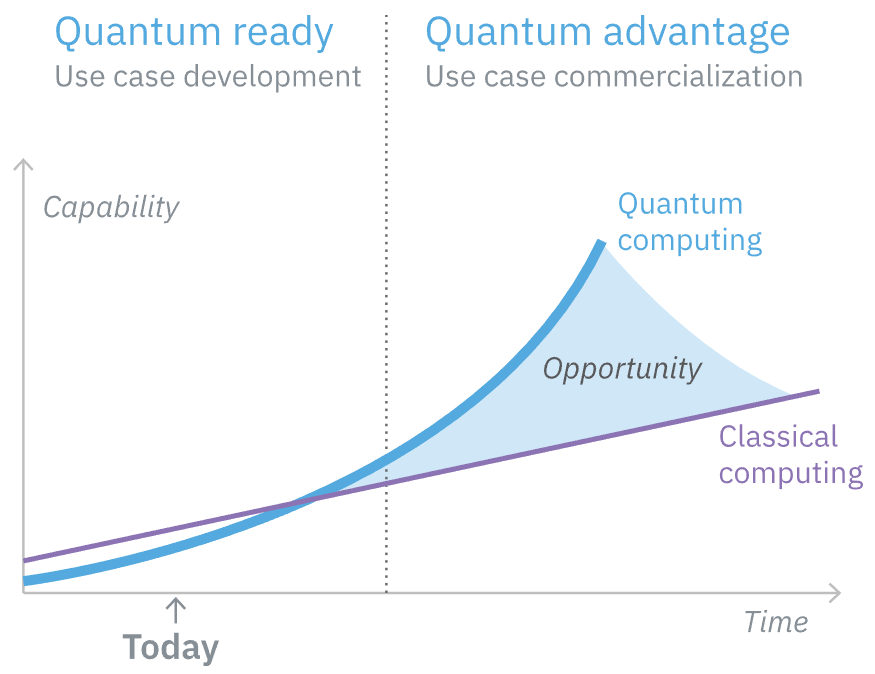

<p style="font-size:10px;font-style:italic;text-align:right"><a href="https://www.ibm.com/thought-leadership/institute-business-value/report/quantumstrategy" target="_blank">Imagen obtenida de IBM Institute for Bussiness Value</a></p>

<a id="1.1"></a>
## 1.A. Supremacía cuántica

Se le conoce como **[supremacía cuántica](https://en.wikipedia.org/wiki/Quantum_supremacy)** al objetivo de demostrar que un dispositivo cuántico programable puede resolver un problema que ninguna computadora clásica puede resolver en cualquier cantidad de tiempo factible (independientemente de la utilidad del problema).

En Octubre de 2019, Google clamó haber alcanzado la **supremacia cuántica** con su computadora cuántica llamada *Sycamore* [[Arute, F., et. al.](https://www.nature.com/articles/s41586-019-1666-5)]; sin embargo, IBM no tardó en salir a cuestionar esa afirmación [[Pednault, E., et. al.](https://arxiv.org/abs/1910.09534)].

Las siguientes son propuestas para demostrar la supremacía cuántica usando la tecnologia actual, usualmente llamada [NISQ](https://en.wikipedia.org/wiki/Noisy_intermediate-scale_quantum_era) (Noisy Intermediate-Scale Quantum):

- un problema computacional bien definido
- un algoritmo cuántico que resuelva este problema
- un algoritmo cláico para comparar el mejor de los casos al resolver el problema
- un argumento teórico de la complejidad que, bajo una suposición razonable, ningún algoritmo clásico puede ser significativamente mejor

Ejemplos de algoritmos a usar en estas propuestas: [Algoritmo de Shor](https://en.wikipedia.org/wiki/Shor%27s_algorithm) (para factorizar enteros), [Muestreo de bosones](https://en.wikipedia.org/wiki/Boson_sampling) (para resolver problemas de muestreo y búsqueda en fotones idénticos) [Muestreo de la distribución de salida de circuitos cuánticos aleatorios](https://en.wikipedia.org/wiki/Cross-entropy_benchmarking) (para simular un circuito cuántico aleatorio arbitrario). Este último fue el usado por Google en su famoso artículo de 2019.

<a id="1.2"></a>
## 1.B. Ejemplos de algoritmos cuánticos

A continuación se enlistan algunos algoritmos cuánticos famosos, agruados por la técnica principal de la cual dependen:

- Algoritmos basados en la [Transformada Cuántica de Fourier](https://en.wikipedia.org/wiki/Quantum_Fourier_transform)
   - Algoritmo [Deutsch–Jozsa](https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm)
   - Algorimto [Bernstein–Vazirani](https://en.wikipedia.org/wiki/Bernstein%E2%80%93Vazirani_algorithm)
   - Algoritmo de [Simon](https://en.wikipedia.org/wiki/Simon%27s_algorithm)
   - Algoritmo de [Estimación de Fase Cuántica](https://en.wikipedia.org/wiki/Quantum_phase_estimation_algorithm)
   - Algoritmo de [Shor](https://en.wikipedia.org/wiki/Shor%27s_algorithm)
- Algoritmos basados en [Amplificación de Amplitud](https://en.wikipedia.org/wiki/Amplitude_amplification)
   - Algoritmo de [Grover](https://en.wikipedia.org/wiki/Grover%27s_algorithm)
   - Algoritmo de [Conteo Cuántico](https://en.wikipedia.org/wiki/Quantum_counting_algorithm)
- Algoritmos basados en [Caminatas Cuánticas](https://en.wikipedia.org/wiki/Quantum_walk)
   - Algoritmo de [Distinción de Elementos](https://en.wikipedia.org/wiki/Element_distinctness_problem)
   - Problema de [Búsqueda de Triángulos](https://en.wikipedia.org/wiki/Triangle-free_graph#Triangle_finding_problem)
- Algoritmos [Híbridos Cuánticos/Clásicos]
   - Algoritmo [Cuántico de Optimización Aproximada](https://en.wikipedia.org/wiki/Quantum_optimization_algorithms) (QAOA)
   - Algoritmo [Solucionador Propio Variacional Cuántico](https://en.wikipedia.org/wiki/Variational_quantum_eigensolver) (VQE)

Aquí veremos algunos de estos algoritmos, así como otros que no requieren de una técnica especial, pero que si usan carcateriísticas cuánticas.

<a id="1.3"></a>
## 1.C. Problemas BQP completos

La clase de complejidad [BQP](https://en.wikipedia.org/wiki/BQP) (tiempo polinomial cuántico de error acotado, BQP: Bounded-error Quantum Polynomial) es el conjunto de problemas de decisión que puede resolver una computadora cuántica en tiempo polinomial con una probabilidad de error de como máximo 1/3 para todas las instancias [Nielse, M., Chuang, I.](http://mmrc.amss.cas.cn/tlb/201702/W020170224608149940643.pdf). Es el análogo cuántico de la clase de complejidad clásica [BPP](https://en.wikipedia.org/wiki/BPP_(complexity)).

Un problema es BQP-completo si está en BQP y cualquier problema en BQP se puede reducir a él en tiempo polinomial. De manera informal, la clase de problemas BQP-completos son aquellos que son tan difíciles como los problemas más difíciles de BQP y que una computadora cuántica puede resolver de manera eficiente (con error acotado).

Algunos ejemplos de problemas BQP completos son: [Cálculo de invariantes de nudos](https://en.wikipedia.org/wiki/Topological_quantum_field_theory), [Simulación cuántica](https://en.wikipedia.org/wiki/Hamiltonian_simulation), [Resollver un sistema de ecuaciones lineales](https://en.wikipedia.org/wiki/Quantum_algorithm_for_linear_systems_of_equations).

<a id="2"></a>
# 2. Algoritmos Cuánticos

<a id="2.1"></a>
## 2.A. Sumador completo cuántico

Este algortimo nos servirá para ver que podemos implementar algoritmos clásicos en las computadoras clásicas.

Al igual que en la electrónica clásica, donde podemos hacer diferentes tipos de [sumadores binarios](https://en.wikipedia.org/wiki/Adder_(electronics)) como semisumadores, sumadores completos, sumadores con propagación de acarreo, etcétera, también se pueden hacer sumadores en circuitos cuánticos. En este ejemplo, mostraremos cómo se crea un sumador completo cuántico y cómo actúa este sumador en los estados de superposición.

El *sumador completo* suma a los bits de entrada $A$ y $B$ más un bit de entrada de acarreo $C_{in}$ y produce los bits de suma y  salida de acarreo $C_{out}$. En la electrónica de control clásica, el sumador completo tiene, por lo tanto, tres entradas y dos salidas.

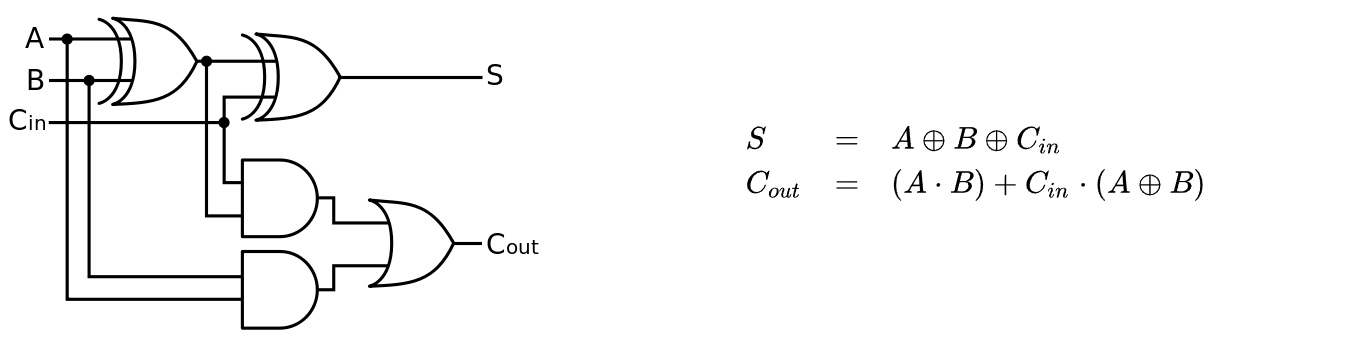

<p style="font-size:10px;font-style:italic;text-align:right"><a href="https://microcontrollerslab.com/cd4008-4-bit-full-adder-ic-pinout-features-example-datasheet/" target="_blank">Imagen obtenida de MicrocontrollersLab</a></p>

Dado que los circuitos cuánticos son reversibles, tienen la misma cantidad de qubits de entrada y salida, por lo que definimos una función de $4$ qubits, donde los qubits de entrada son `A`, `B`, `CarryIn` y `[cero]` y los qubits de salida son `A`, `B`, `Sum` y `CarryOut`.

Una posible implementación de un sumador cuántico completo de 2 bits, usando compuertas $CNOT$ y compuertas *Toffoli* es la siguiente:

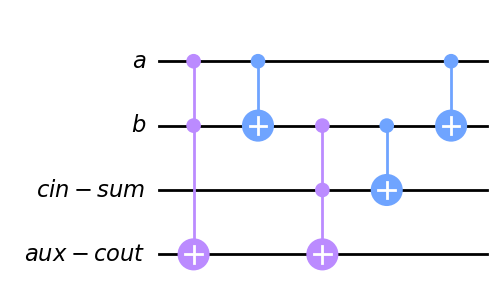

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

A = QuantumRegister(1, 'a')
B = QuantumRegister(1, 'b')
CarryIn = QuantumRegister(1, 'cin-sum')
cero = QuantumRegister(1, 'aux-cout')
adder = QuantumCircuit(A, B, CarryIn, cero)

adder.ccx(0, 1, 3)
adder.cx(0, 1)
adder.ccx(1, 2, 3)
adder.cx(1, 2)
adder.cx(0, 1)

adder.draw('mpl')

Ahora probemos el sumador anterior, inicializando los qubits de entrada `a`, `b` y `cin`, con un estado que corresponda a los bits que se desea sumar, con los estados $\ket{0}$ y $\ket{1}$, por ejemplo `a=1`, `b=0` y `cin=1`.

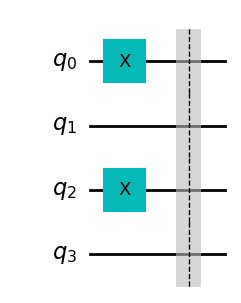

In [2]:
inicializacion = QuantumCircuit(4)

inicializacion.x(0)    # a   = 1
inicializacion.x(2)    # cin = 1
inicializacion.barrier()

inicializacion.draw('mpl')

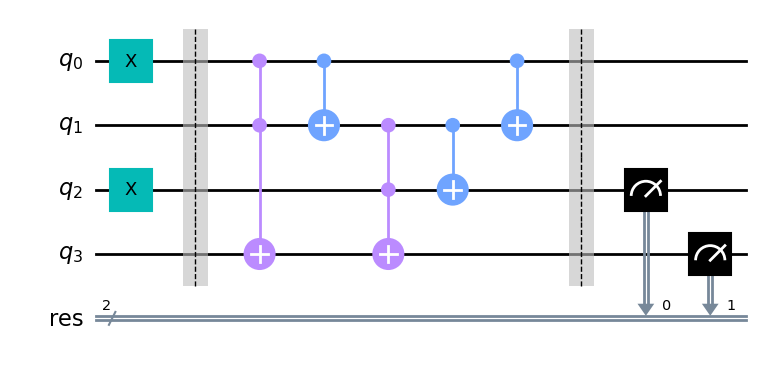

In [3]:
suma = inicializacion.compose(adder)

suma.barrier()

suma.add_register(ClassicalRegister(2, 'res'))

suma.measure([2, 3], [0, 1])

suma.draw('mpl')

{'10': 1000}


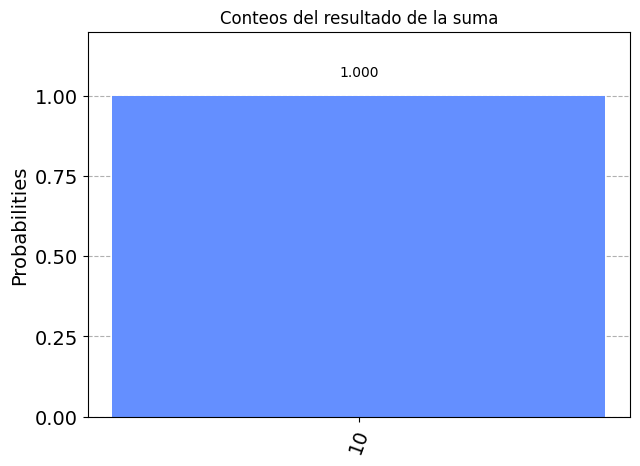

In [4]:
from qiskit import execute, Aer
from qiskit.tools.visualization import plot_histogram

job = execute(suma, Aer.get_backend('aer_simulator'), shots=1000)
counts = job.result().get_counts(suma)
print(counts)

plot_histogram(counts, title='Conteos del resultado de la suma') 

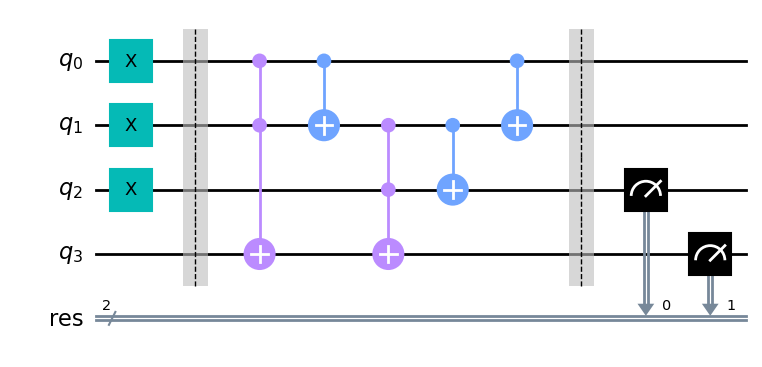

{'11': 1}


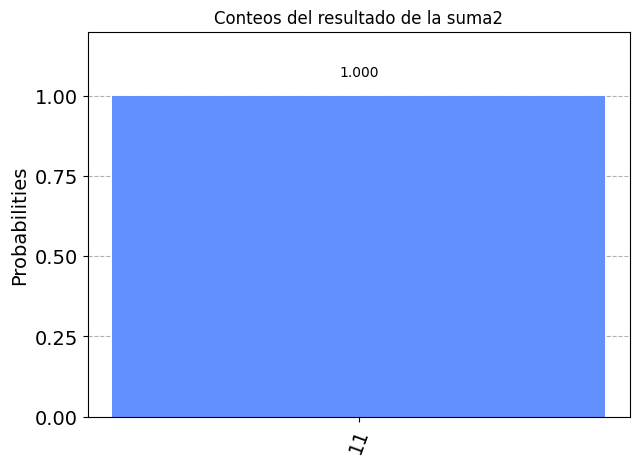

In [5]:
inicializacion2 = QuantumCircuit(4)
inicializacion2.x(0)    # a   = 1
inicializacion2.x(1)    # b   = 1
inicializacion2.x(2)    # cin = 1
inicializacion2.barrier()

suma2 = inicializacion2.compose(adder)
suma2.barrier()
suma2.add_register(ClassicalRegister(2, 'res'))
suma2.measure([2, 3], [0, 1])
display(suma2.draw('mpl'))

job = execute(suma2, Aer.get_backend('aer_simulator'), shots=1)  # con una sola ejecución es suficiente
counts2 = job.result().get_counts(suma2)
print(counts2)
plot_histogram(counts2, title='Conteos del resultado de la suma2') 

Todos los posibles resultados se tienen en la siguiente tabla de verdad:


|Estado|q3|q2|q1|q0|$\cdot$|q3|q2|q1|q0|
|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:-----:|
|$\cdot$|aux|Cin|$B$|$A$|$\cdot$|Cout|Sum|$B$|$A$|
|E1|0|0|0|0|$\cdot$|0|0|0|0|
|E2|0|0|0|1|$\cdot$|0|1|0|1|
|E3|0|0|1|0|$\cdot$|0|1|1|0|
|E4|0|0|1|1|$\cdot$|1|0|1|1|
|E5|0|1|0|0|$\cdot$|0|1|0|0|
|E6|0|1|0|1|$\cdot$|1|0|0|1|
|E7|0|1|1|0|$\cdot$|1|0|1|0|
|E8|0|1|1|1|$\cdot$|1|1|1|1|

<a id="2.1.1"></a>
## 2.A.a. Ventaja de que el circuito sea cuántico

También podemos usar estados en superposición y estados entrelazados, como en el siguiente ejemplo donde se establece `A` y `B` en un **estado de Bell** y `CarryIn` en un estado de superposición. Esto es similar a establecer la entrada en los estados E1, E2, E7 y E8 al mismo tiempo.

Comparando nuevamente la tabla de verdad con el histograma de amplitudes de probabilidad, vemos que se generan los 4 estados de salida que esperaríamos.

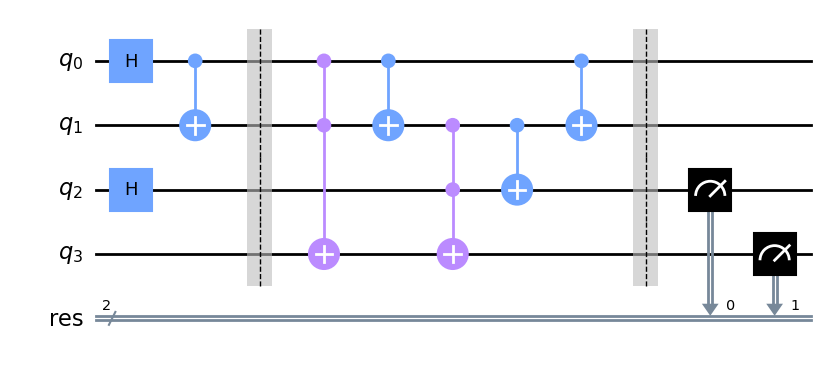

{'01': 261, '10': 261, '00': 228, '11': 250}


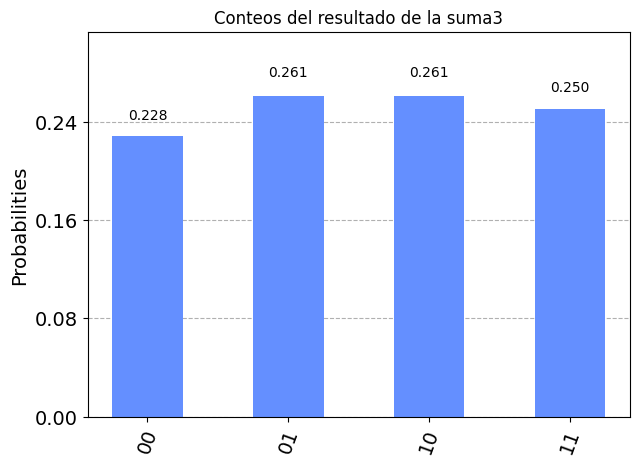

In [6]:
inicializacion3 = QuantumCircuit(4)
inicializacion3.h(0)        # a y b en estado de Bell
inicializacion3.cx(0, 1)
inicializacion3.h(2)        # estado en superposión: ( |0> + |1> ) / sqrt(2)
inicializacion3.barrier()

suma3 = inicializacion3.compose(adder)  # el 'adder' es el mismo
suma3.barrier()
suma3.add_register(ClassicalRegister(2, 'res'))
suma3.measure([2, 3], [0, 1])
display(suma3.draw('mpl'))

job = execute(suma3, Aer.get_backend('aer_simulator'), shots=1000)  # en este caso si necesitamos multiples shots
counts3 = job.result().get_counts(suma3)
print(counts3)
plot_histogram(counts3, title='Conteos del resultado de la suma3') 

Qiskit cuenta con clases que facilitan las sumas de qubits, como las clases: [`CDKMRippleCarryAdder`](https://qiskit.org/documentation/_modules/qiskit/circuit/library/arithmetic/adders/cdkm_ripple_carry_adder.html), [`DraperQFTAdder`](https://qiskit.org/documentation/_modules/qiskit/circuit/library/arithmetic/adders/draper_qft_adder.html), [`VBERippleCarryAdder`](https://qiskit.org/documentation/_modules/qiskit/circuit/library/arithmetic/adders/vbe_ripple_carry_adder.html).

A continuación tenemos un ejemplo que usa la clase `CDKMRippleCarryAdder` para sumar $3+5$:

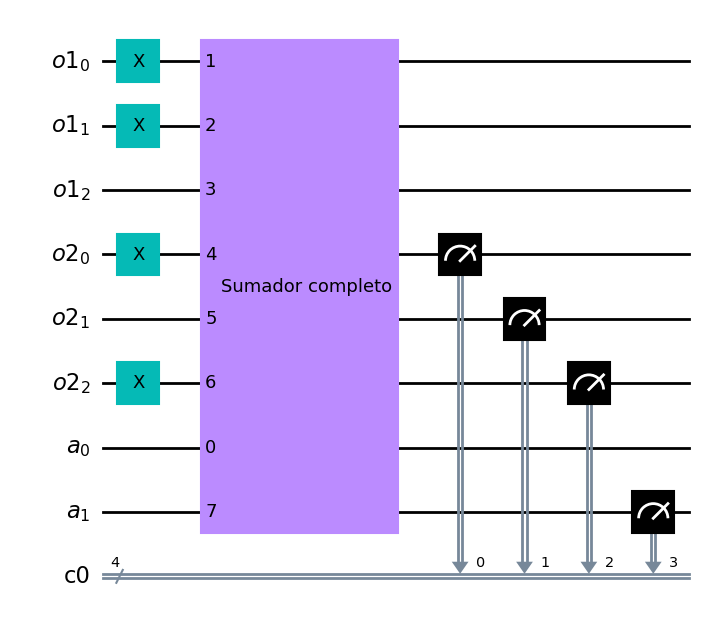

{'1000': 1000}


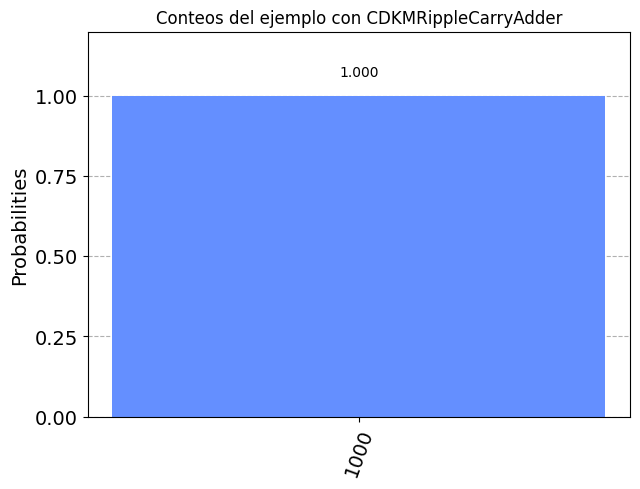

In [7]:
from qiskit.circuit.library.arithmetic.adders import CDKMRippleCarryAdder

qiskit_adder = CDKMRippleCarryAdder(3, 'full', 'Sumador completo')

operando1 = QuantumRegister(3, 'o1')  # primer número a sumar
operando2 = QuantumRegister(3, 'o2')  # segundo número a sumar
aux = QuantumRegister(2, 'a')         # acarreo de entrada y de salida
cr = ClassicalRegister(4)             # para almacenar el resultado en bits clásicos

circ = QuantumCircuit(operando1, operando2, aux, cr)

circ.x([operando1[0], operando1[1]])  # 3 en binario: 011
circ.x([operando2[0], operando2[2]])  # 5 en binario: 101

# El orden esperado por la clase 'CDKMRippleCarryAdder' es: carry_in - 1er operando - 2do operando - carry_out
circ.append(qiskit_adder, [aux[0]] + operando1[0:3] + operando2[0:3] + [aux[1]])

circ.measure(operando2[0:3] + [aux[1]], cr) #  esta clase escribe el resultado en el 2do operando y en el carry_out
display(circ.draw('mpl'))

job = execute(circ, Aer.get_backend('aer_simulator'), shots=1000)
counts = job.result().get_counts(circ)
print(counts) # resultado es 8 en binario: 1000

plot_histogram(counts, title='Conteos del ejemplo con CDKMRippleCarryAdder') 

<a id="2.2"></a>
## 2.B. Protocolo de teleportación

Alicia quiere enviar información cuántica a Bob. Específicamente, supongamos que quiere enviar un estado cuántico, un qubit: $\ket{\psi}=\alpha\ket{0}+\beta\ket{1}$. Esto implica transmitir información sobre $\alpha$ y $\beta$ a Bob.

Existe un teorema en la mecánica cuántica que establece que no es posible simplemente hacer una copia exacta de un estado cuántico desconocido. Esto se conoce como el [teorema de la no clonación](https://en.wikipedia.org/wiki/No-cloning_theorem). Como resultado de esto, podemos ver que Alicia no puede simplemente generar una copia de $\ket{\psi}$ y dársela a Bob. Solo podemos copiar estados clásicos (no superposiciones).

Sin embargo, al aprovechar dos bits clásicos y un par de qubit entrelazados, Alicia puede transferir su estado $\ket{\psi}$ a Bob. A esto se le conoce como teletransportación porque, al final, Bob tendrá a $\ket{\psi}$ y Alicia ya no.

$$$$

Para transferir un estado cuántico, Alicia y Bob deben tener ayuda de un tercero, llamemoslo Carlos, que se encargue de enviarles un par de qubits entrelazados. Luego, Alice realiza algunas operaciones en su qubit, envía los resultados a Bob a través de un *canal de comunicación clásico*, y Bob luego realiza algunas operaciones en su extremo para recibir el qubit de Alice.

Entonces, Alicia tendrá dos qubits, en uno estará el estado que desea enviarle a Bob, el otro lo utilizará para mantener un estado entrelazado con el único qubit de Bob.

Veamos los pasos a seguir:

### Paso 1

Todo comienza con la necesidad de enviar un estado cuántico aleatorio, en particular un qubit, es decir, escrito de la forma:

$$\ket{\psi}=\alpha\ket{0}+\beta\ket{1}$$

Quian lo envía, Alicia, no conoce dicho estado a ser enviado.

Creamos los qubits necesarios para llevar a cabo este protocolo:

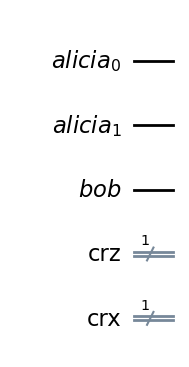

In [8]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr_alice = QuantumRegister(2, name="alicia")   # dos qubits de Alicia
qr_bob = QuantumRegister(1, name="bob")        # un qubit de Bob
crz = ClassicalRegister(1, name="crz")         # 2 bits clasicos
crx = ClassicalRegister(1, name="crx")         # en 2 diferentes registros

circuito_teleportacion = QuantumCircuit(qr_alice, qr_bob, crz, crx)

circuito_teleportacion.draw('mpl')

Su amigo en común, Carlos, se encarga de preparar un estado entrelazado entre uno de los qubits de Alicia (el qubit 1) y el qubit de Bob. El estado que prepara es un **estado de Bell**. En el lenguaje de circuitos cuánticos, la forma de crear un *par de Bell* entre dos qubits es primero transferir uno de ellos a la base $X$ ($\ket{+}$ y $\ket{-}$) usando una compuerta de Hadamard, y luego aplicar una compuerta $CNOT$ en el otro qubit controlado por el que está en la base $X$.

El par entrelazado, usando los qubits $\ket{q_2q_1}=\ket{0_b 0_{a_1}}$ queda como,

$$CNOT_{1,2}\big(I\otimes H\big)\ket{0_b 0_{a_1}}=\frac{1}{\sqrt2}\big(\ket{0_b 0_{a_1}}+\ket{1_b 1_{a_1}}\big)=\ket{e}$$

In [9]:
def crear_estado_bell(circ, a, b):
    circ.h(a)     # poner el qubit a en el estado |+>
    circ.cx(a, b) # CNOT con control el qubit a y objetivo el qubit b

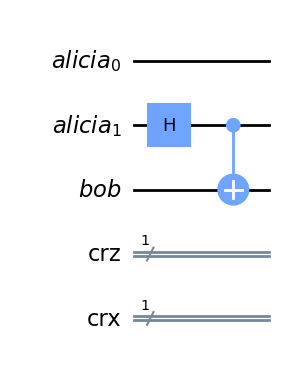

In [10]:
crear_estado_bell(circuito_teleportacion, 1, 2) # circuito, qubit a, qubit b

circuito_teleportacion.draw('mpl')

Después de esto, el estado de 3 qubits, incluyendo el estado a ser enviado $\ket{\psi}$, queda como,

$$\begin{aligned}
\ket{e}\otimes\ket{\psi}&=\frac{1}{\sqrt2}\Big(\big(\ket{00}+\ket{11}\big)\otimes \alpha\ket{0} + \big(\ket{00}+\ket{11}\big)\otimes \beta\ket{1}\Big)\\
&=\frac{1}{\sqrt2}\big(\alpha\ket{000}+\alpha\ket{110}+\beta\ket{001}+\beta\ket{111}\big)
\end{aligned}$$

### Paso 2

Ahora, de acuerdo con el protocolo, Alicia aplica la compuerta $CNOT$ en sus dos qubits, usando de control el qubit a ser enviado $\ket{\psi}$, seguido de una compuerta Hadamard en ese mismo qubit. Esto da como resultado el estado:

$$\begin{aligned}
\Big(I\otimes I\otimes H\Big)\Big(I\otimes CNOT_{0,1}\Big)\Big(\ket{e}\otimes\ket{\psi}\Big)&=\Big(I\otimes I\otimes H\Big)\Big(I\otimes CNOT_{0,1}\Big)\frac{1}{\sqrt2}\Big(\alpha\ket{000}+\alpha\ket{110}+\beta\ket{001}+\beta\ket{111}\Big)\\
&=\Big(I\otimes I\otimes H\Big)\frac{1}{\sqrt2}\Big(\alpha\ket{000}+\alpha\ket{110}+\beta\ket{011}+\beta\ket{101}\Big)\\
&=\frac{1}{2}\Big(\alpha\big(\ket{000}+\ket{001}+\ket{110}+\ket{111}\big)+\beta\big(\ket{010}-\ket{011}+\ket{100}-\ket{101}\big)\Big)
\end{aligned}$$

Que puede ser reescrito cmo:

$$\begin{aligned}
=\frac{1}{2} \Big( & ~~~~~~\big(\alpha\ket{0}+\beta\ket{1}\big)~~\ket{00}\\
&+ ~\big(\alpha\ket{0}-\beta\ket{1}\big)~~\ket{01}\\
&+ ~\big(\alpha\ket{1}+\beta\ket{0}\big)~~\ket{10}\\
&+ ~\big(\alpha\ket{1}-\beta\ket{0}\big)~~\ket{11}~~~~~\Big)\\
\end{aligned}$$

En código queda como:

In [11]:
def compuertas_alicia(circ, psi, a):
    circ.barrier()
    circ.cx(psi, a)
    circ.h(psi)

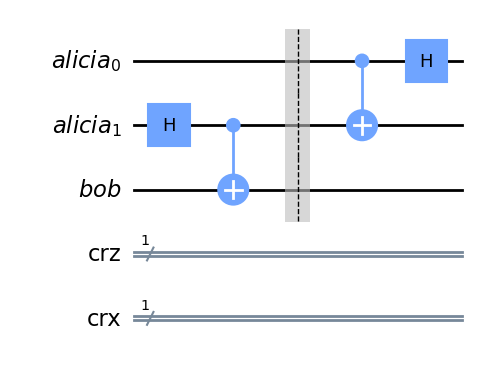

In [12]:
compuertas_alicia(circuito_teleportacion, 0, 1)

circuito_teleportacion.draw('mpl')

### Paso 3

Alicia mide los dos primeros qubits (que son de su propiedad) y los envía como dos bits clásicos a Bob. El resultado que Alicia obtiene es siempre uno de los cuatro estados básicos estándar $\ket{00}$, $\ket{01}$, $\ket{10}$, $\ket{11}$, con igual probabilidad.

Sobre la base de su medición, el estado de Bob se proyectará a,

$$\ket{00}\rightarrow \big(\alpha\ket{0}+\beta\ket{1}\big)$$
$$\ket{01}\rightarrow \big(\alpha\ket{0}-\beta\ket{1}\big)$$
$$\ket{10}\rightarrow \big(\alpha\ket{1}+\beta\ket{0}\big)$$
$$\ket{11}\rightarrow \big(\alpha\ket{1}-\beta\ket{0}\big)$$

Entonces agregamos las mediciones a los qubits de Alicia:

In [13]:
def mediciones_y_envio(circ, psi, a):
    circ.barrier()
    circ.measure(psi, 0)
    circ.measure(a, 1)

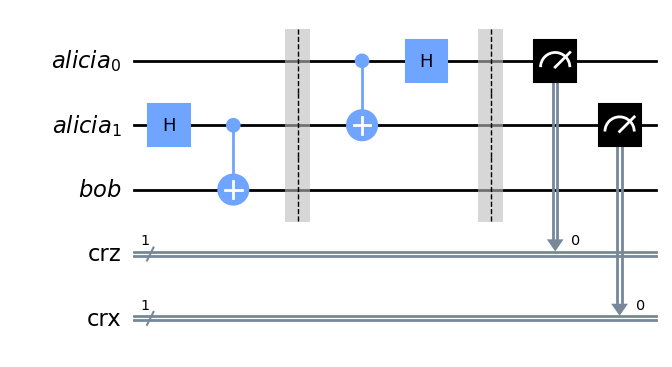

In [14]:
mediciones_y_envio(circuito_teleportacion, 0, 1)

circuito_teleportacion.draw('mpl')

### Paso 4

Bob, al recibir los bits de Alicia, sabe que puede obtener el estado original aplicando las transformaciones apropiadas en su qubit que una vez fue parte del par de Bell entrelazado.

Las transformaciones que necesita aplicar son:

|                Estado de Bob           | Bits recibidos | Compuerta(s) a aplicar |
|:--------------------------------------:|:------------:|:-------------:|
|$$\big(\alpha\ket{0}+\beta\ket{1}\big)$$|00|$$I$$|
|$$\big(\alpha\ket{0}-\beta\ket{1}\big)$$|01|$$Z$$|
|$$\big(\alpha\ket{1}+\beta\ket{0}\big)$$|10|$$X$$|
|$$\big(\alpha\ket{1}-\beta\ket{0}\big)$$|11|$$ZX$$|

Después de este paso, Bob habrá reconstruido con éxito el estado de Alice.

**Nota**: Esta transferencia de información es puramente clásica.

In [15]:
def compuertas_bob(circ, b, crz, crx):
    circ.barrier()
    circ.x(b).c_if(crx, 1)
    circ.z(b).c_if(crz, 1)

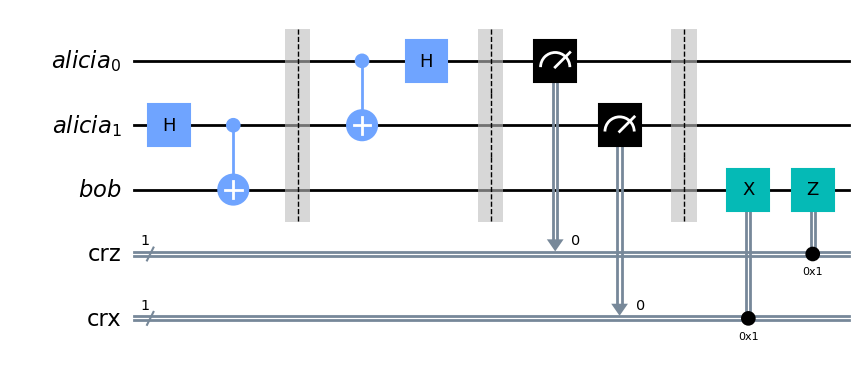

In [16]:
compuertas_bob(circuito_teleportacion, 2, crz, crx)

circuito_teleportacion.draw('mpl')

Al final de este protocolo, el qubit de Alice ahora se ha teletransportado a Bob.

Comprobemoslo ejecutando el protocolo completo y simulandolo:

<IPython.core.display.Latex object>

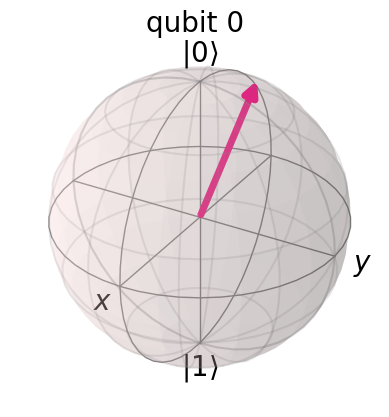

In [17]:
from qiskit.quantum_info import random_statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

# generamos un estado aleatorio (el que enviará Alicia Bob y al ser aleatorio ella no lo conoce)
psi = random_statevector(2)

# veamos que de que estado se trata

display(array_to_latex(psi, prefix="|\\psi\\rangle ="))

plot_bloch_multivector(psi)

In [18]:
from qiskit.extensions import Initialize

# crear una instruccion de inicializacion que coloque al qubit en el estado que generamos aleatoriamente
instruccion_inicializacion = Initialize(psi)
instruccion_inicializacion.label = "init"

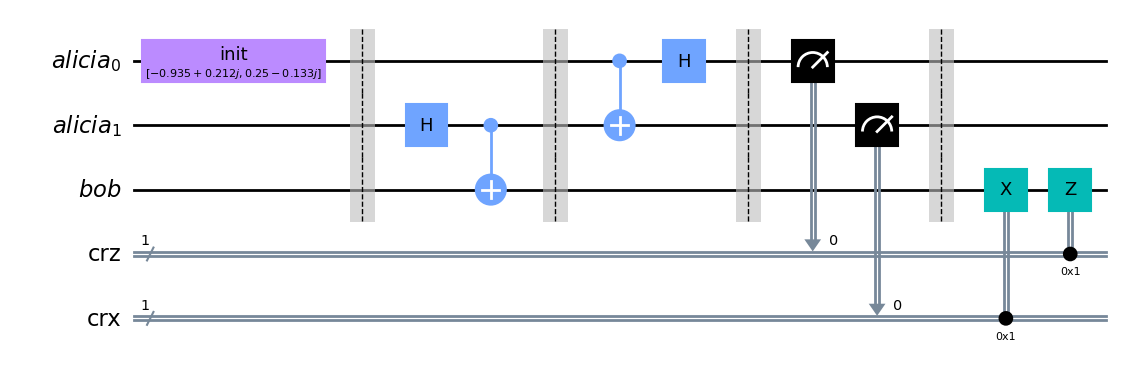

In [19]:
# El protocolo completo:

# Configuración inicial
qr_alice = QuantumRegister(2, name="alicia")   # dos qubits de Alicia
qr_bob = QuantumRegister(1, name="bob")        # un qubit de Bob
crz = ClassicalRegister(1, name="crz")         # 2 bits clasicos
crx = ClassicalRegister(1, name="crx")         # en 2 diferentes registros
circuito_teleportacion = QuantumCircuit(qr_alice, qr_bob, crz, crx)

# Paso 0
# Iniciar el qubit a enviar
circuito_teleportacion.append(instruccion_inicializacion, [0])
circuito_teleportacion.barrier()

# Paso 1
# Crear el par entrelazado
crear_estado_bell(circuito_teleportacion, 1, 2) # circuito, qubit a, qubit b

# Paso 2
# "Enviar" q1 a Alicia y q2 a Bob
compuertas_alicia(circuito_teleportacion, 0, 1)

# Paso 3
# Alicia envia sus bits clásicos a Bob
mediciones_y_envio(circuito_teleportacion, 0, 1)

# Paso 4
# Bob decodifica su qubit
compuertas_bob(circuito_teleportacion, 2, crz, crx)


circuito_teleportacion.draw('mpl')

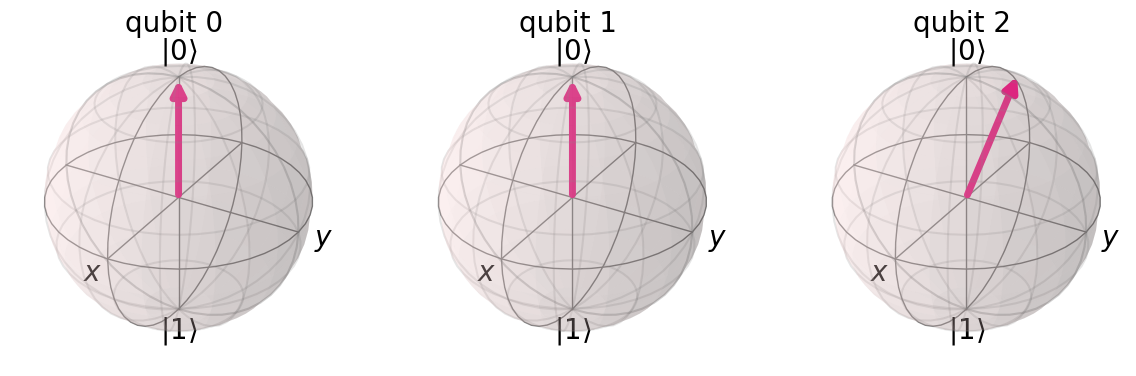

<IPython.core.display.Latex object>

In [20]:
sim = Aer.get_backend('aer_simulator')
circuito_teleportacion.save_statevector()
out_vector = sim.run(circuito_teleportacion).result().get_statevector()
display(plot_bloch_multivector(out_vector))

out_vector.draw('latex')

La teleportación cuántica está diseñada para enviar qubits entre dos partes. No tenemos el hardware para demostrar esto, pero podemos demostrar que las compuertas realizan las transformaciones correctas. Aquí usamos nuevamente el simulador aer para comprobar el protocolo.

En una computadora cuántica real, no podríamos muestrear el vector de estado, por lo que si queremos verificar que nuestro circuito de teleportación funciona, debemos hacer las cosas de manera ligeramente diferente. La instrucción `Initialize` primero realiza un reestablecimiento, configurando nuestro qubit al estado $\ket{0}$. Luego aplica compuertas para convertir nuestro qubit $\ket{0}$ en el estado $\ket{\psi}$:

$$$$
$$\ket{0}\xrightarrow{\text{ compuertas de inicialización }}\ket{\psi}$$
$$$$

Dado que todas las compuertas cuánticas son reversibles, podemos encontrar el inverso de estas compuertas usando:

In [21]:
reverso_instruccion_inicializacion = instruccion_inicializacion.gates_to_uncompute()

Esta operación tiene la propiedad:

$$$$
$$\ket{\psi}\xrightarrow{\text{ inverso de las compuertas de inicialización }}\ket{0}$$
$$$$

Para probar que el qubit $\ket{q_0}$ ha sido teletportado a $\ket{q_2}$, aplicamos el inverso de la inicialización en $\ket{q_2}$, esperamos medir $\ket{0}$ con certeza:

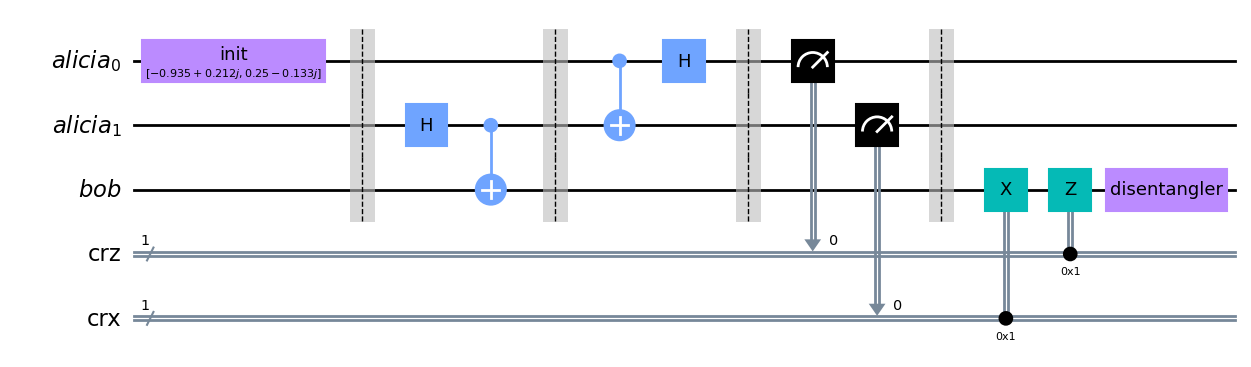

In [22]:
qr_alice = QuantumRegister(2, name="alicia")   # dos qubits de Alicia
qr_bob = QuantumRegister(1, name="bob")        # un qubit de Bob
crz = ClassicalRegister(1, name="crz")         # 2 bits clasicos
crx = ClassicalRegister(1, name="crx")         # en 2 diferentes registros
circuito_teleportacion = QuantumCircuit(qr_alice, qr_bob, crz, crx)

# Paso 0
# Iniciar el qubit a enviar
circuito_teleportacion.append(instruccion_inicializacion, [0])
circuito_teleportacion.barrier()

# Paso 1
# Crear el par entrelazado
crear_estado_bell(circuito_teleportacion, 1, 2) # circuito, qubit a, qubit b

# Paso 2
# "Enviar" q1 a Alicia y q2 a Bob
compuertas_alicia(circuito_teleportacion, 0, 1)

# Paso 3
# Alicia envia sus bits clásicos a Bob
mediciones_y_envio(circuito_teleportacion, 0, 1)

# Paso 4
# Bob decodifica su qubit
compuertas_bob(circuito_teleportacion, 2, crz, crx)

circuito_teleportacion.append(reverso_instruccion_inicializacion, [2])

circuito_teleportacion.draw('mpl')

Podemos ver que aparce el la operación `reverso_instruccion_inicializacion`, etiquetado como `disentangler` en el diagrama del circuito. Finalmente, medimos el tercer qubit y almacenamos el resultado en el tercer bit clásico:

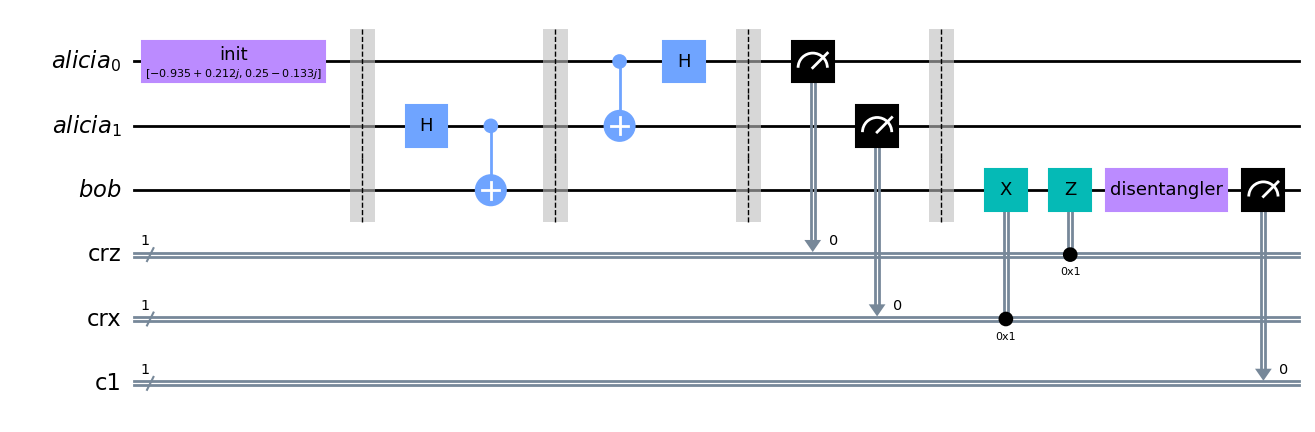

In [23]:
cr_result = ClassicalRegister(1)
circuito_teleportacion.add_register(cr_result)
circuito_teleportacion.measure(2, 2)
circuito_teleportacion.draw('mpl')

Y ejecutamos nuestro experimento:

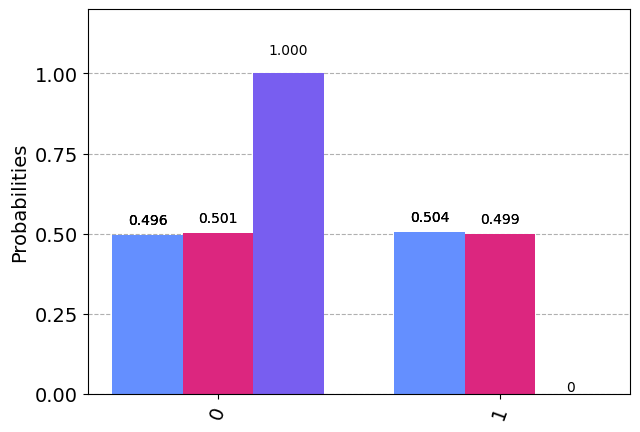

In [24]:
from qiskit.result import marginal_counts
from qiskit import transpile

t_qc = transpile(circuito_teleportacion, sim)
t_qc.save_statevector()
counts = sim.run(t_qc).result().get_counts()
qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(3)]
plot_histogram(qubit_counts)

Podemos ver que tenemos un 100% de posibilidades de medir $\ket{q_2}$ (la barra morada en el histograma) en el estado $\ket{0}$. Este es el resultado esperado e indica que el protocolo de teleportación ha funcionado correctamente.

<a id="2.3"></a>
## 2.C. Algoritmo de Deutsch – Jozsa

El **algoritmo de Deutsch-Jozsa** es un algoritmo cuántico determinista propuesto por David Deutsch y Richard Jozsa en 1992 [[Deutsch, D., Jozsa, R.](https://royalsocietypublishing.org/doi/10.1098/rspa.1992.0167)]. Aunque actualmente tiene poco uso práctico, es uno de los primeros ejemplos de un algoritmo cuántico que es exponencialmente más rápido que cualquier algoritmo clásico determinista posible.

<a id="2.3.1"></a>
### 2.C.a. El problema

Se tiene una función booleana oculta $f$, conocida como *caja negra* o como **oráculo**, que toma como entrada una cadena de bits y devuelve $0$ o $1$, es decir:

$$f\big(\{x_0, x_1, x_2, \cdots\}\big)\rightarrow0 \text{ o } 1 \text{, donde } x_n \text{ es } 0 \text{ o } 1$$

La propiedad de la función booleana dada es que se garantiza que sea **balanceada** o **constante**. Una función *constante* devuelve siempre $0$ o siempre $1$ para cualquier entrada, mientras que una función *balanceada* devuelve $0$ para exactamente la mitad de todas las entradas y $1$ para la otra mitad. Nuestra tarea es determinar si la función dada es balanceada o constante.

Se debe tener en cuenta que el problema de Deutsch-Jozsa es una extensión de $n$ bits del problema de Deutsch de un solo bit [[Deutsch, D.](https://royalsocietypublishing.org/doi/10.1098/rspa.1985.0070)].

<a id="2.3.2"></a>
### 2.C.b. Solución clásica

En el mejor de los casos, en una solución clásica, se necesitan dos consultas al *oráculo* para determinar si la función booleana oculta $f(x)$ es balanceada, por ejemplo si las siguientes consultas regresan el valor dado:

$$f(0, 0, 0, 0, \cdots)\rightarrow 0$$
$$f(1, 0, 0, 0, \cdots)\rightarrow 1$$

entonces sabremos que la función es *balanceada* pues estamso obteniendo dos resultados distintos.

En el peor de los casos, si al hacer consultas para diferentes entradas obtenemos el mismo resultado, tendríamos que revisar exactamente la mitad de las posibles entradas más una, para poder tener la certeza d que $f(x)$ es constante.

Dado que el total de posibles entradas es $2^n$, se tiene que es necesario probar con $2^{n-1}+1$ entradas para tener la certeza de que el oráculo es constante, en el peor de los casos.

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: 
    
Para cadenas de $4$ bits, tenemos que $n=4$, entonces la cantidad de entradas será $2^4=16$.
    
Por lo que si revisamos $8$ combinaciones de las $16$ posibles y obtenemos siempre la salida igual a $0$, aún es posible que la $9^a$ combinación regrese un $1$, significando que $f(x)$ es *balanceada*.

$$f(0,0,0,0)\rightarrow 0$$
$$f(0,0,0,1)\rightarrow 0$$
$$f(0,0,1,0)\rightarrow 0$$
$$f(0,0,1,1)\rightarrow 0$$
$$f(0,1,0,0)\rightarrow 0$$
$$f(0,1,0,1)\rightarrow 0$$
$$f(0,1,1,0)\rightarrow 0$$
$$f(0,1,1,1)\rightarrow 0$$
$$$$
$$f(1,0,0,0)\rightarrow 1$$

Probabilísticamente hablando, este es un evento muy improbable. De hecho, si obtenemos el mismo resultado continuamente en sucesión, podemos expresar la probabilidad de que la función sea constante en función de $k$ entradas como,

$$P_{\text{constante}}(k)=1-\frac{1}{2^{k-1}} ~~~~~~~~~~~~~~ \text{para } 1<k\leq 2^{n-1}$$

Siendo realistas, podríamos optar por truncar nuestro algoritmo clásico de manera temprana (sin revisar todas las posibles entradas), digamos si tuviéramos más de un $x\%$ de confianza. Pero si queremos estar $100\%$ seguros, necesitaríamos verificar $2^{n-1}+1$ entradas.

<a id="2.3.3"></a>
### 2.C.c. Solución cuántica

Usando una computadora cuántica, podemos resolver este problema con un 100% de confianza después de **una sola llamada a la función $f(x)$**, siempre que tengamos la función $f$ implementada como un **oráculo cuántico**, que asigna el estado $\ket{x}\ket{y}$ al estado $\ket{x}\ket{y\oplus f(x)}$, donde $\oplus$ es la [suma módulo 2](https://en.wikipedia.org/wiki/Modular_arithmetic) (que también se puede ver como una compuerta $XOR$ cuántica implementada como una compuerta $CNOT$).

A continuación se muestra el circuito genérico para el algoritmo de Deutsch-Jozsa.

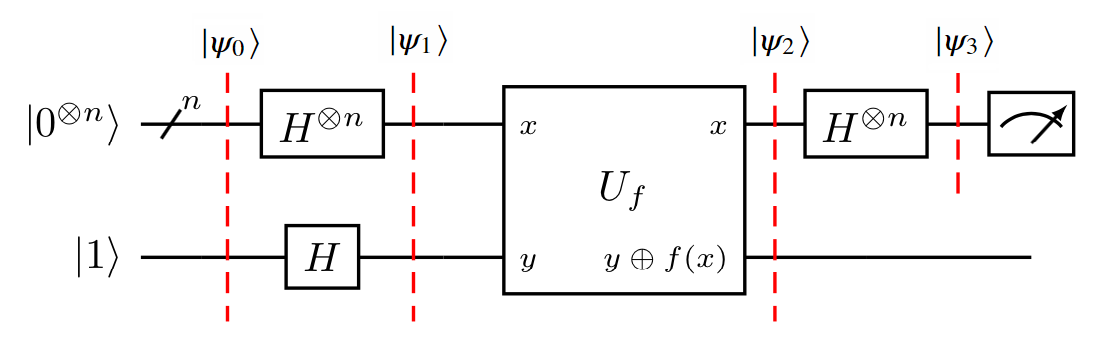

<p style="font-size:10px;font-style:italic;text-align:right"><a href="https://learn.qiskit.org/course/ch-algorithms/deutsch-jozsa-algorithm" target="_blank">Imagen basada una de Qiskit Textbook</a></p>

Veamos los pasos y por cada uno revisemos su implementación en Qiskit, el ejemplo en código será para $n=3$, por lo que tendremos un total de $n+1=4$ qubits.

Antes de ver cada paso, generemos dos oráculos, uno constante y otro balanceado, para comprobar que el algoritmo funciona correctamente.

In [25]:
n = 3           # cantidad de bits para la función f

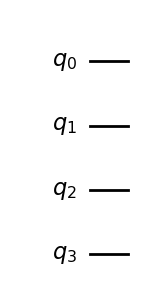

In [26]:
from qiskit import QuantumCircuit
import numpy as np


#---------------------
## Oráculo Constante
#---------------------

const_oraculo = QuantumCircuit(n+1)   # +1 qubit que corresponde al segundo registro

# en este caso, la entrada no tiene efecto en la salida, por lo que simplemente 
# configuramos aleatoriamente el qubit de salida en 0 o 1:

output = np.random.randint(2)
if output == 1:
    const_oraculo.x(n)          # aplicar X al qubits de salida (un solo resultado para todas las entradas)

const_oraculo.draw('mpl')

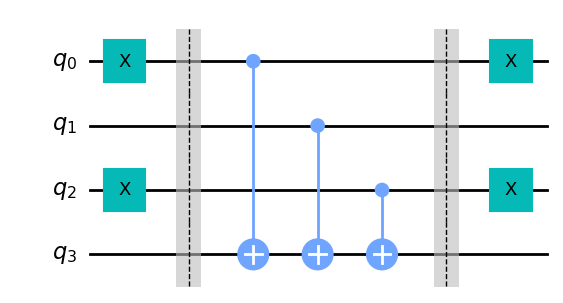

In [27]:
#---------------------
## Oráculo Balanceado
#---------------------

balan_oraculo = QuantumCircuit(n+1)


# podemos crear un oráculo balanceado usando CNOTs con cada qubit de entrada como control
# y el bit de salida como objetivo. Podemos variar los estados de entrada que dan 0 o 1 
# encerrando algunos de los controles con compuertas X. Primero elijamos una cadena binaria de 
# longitud n que dicte qué controles ajustar:

b_str = "101"

# agregar las compuertas X en la posción donde hay un 1
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balan_oraculo.x(qubit)
balan_oraculo.barrier()

# ahora, aplicamos las compuertas CNOT, usando cada qubit de entrada como control y el 
# qubit de salida como objetivo:
for qubit in range(n):
    balan_oraculo.cx(qubit, n)

balan_oraculo.barrier()

# finalmente, aplicamos compuertas X para terminar de envolver los controles:
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balan_oraculo.x(qubit)

balan_oraculo.draw('mpl')

#### Paso 1

Se preparan dos registros cuánticos. El primero en un registro de $n$ qubits inicializado en $\ket{0}^{\otimes n}$, el segund registro es un qubits inicializado en $\ket{1}$,

$$\ket{\psi_0} = \ket{0}^{\otimes n} \, \ket{1}$$

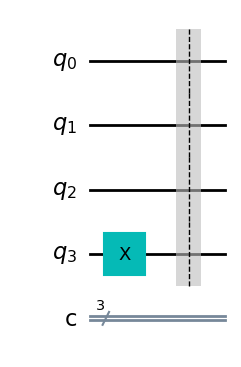

In [28]:
dj_circuit = QuantumCircuit(n+1, n)          # n+1=4 qubits, n=3 bits clásicos

dj_circuit.x(n)                              # colocar el último qubits (segundo registro) en el estado |1>

dj_circuit.barrier()
dj_circuit.draw('mpl')

#### Paso 2

Se aplican compuertas Hadamard a cada qubit,

$$\ket{\psi_1}=\frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \, \ket{x} \, \big(\ket{0}-\ket{1}\big)$$

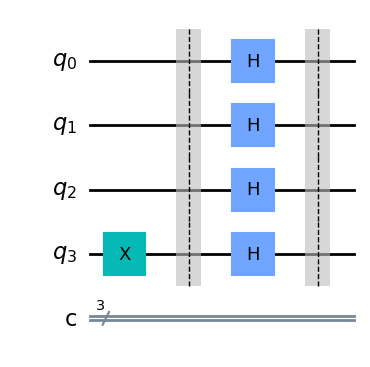

In [29]:
# Aplicar las compuertas H al primer registro
for qubit in range(n):
    dj_circuit.h(qubit)

# Aplicar H al segundo registro, H|1> = |->
dj_circuit.h(n)

dj_circuit.barrier()
dj_circuit.draw('mpl')

#### Paso 3

Aplicar el oráculo al estado $\ket{x}\ket{y}$ obteniendo el estado $\ket{x}\ket{y\oplus f(x)}$, es decir,

$$
\begin{aligned}
\ket{\psi_2}&=\frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \, \ket{x} \, \big(0\oplus \ket{f(x)}-\ket{1\oplus f(x)}\big)\\
&=\frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \, \ket{x} \, \big(\ket{f(x)}-\ket{1\oplus f(x)}\big)\\
&=\frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \, \big(-1\big)^{f(x)} \, \ket{x} \, \big(\ket{0}-\ket{1}\big)\\
\end{aligned}
$$

ya que para cada $x$, la función $f(x)$ es un $0$ o un $1$.

En el código, creamos una función que nos ayuda a agregar el oráculo deseado de acuerdo a un parámetro:

In [30]:
def dj_oraculo(dj_circuit, caso):
    
    if caso == 'balanceado':
        circuit_return = dj_circuit.compose(balan_oraculo)
    else:
        circuit_return = dj_circuit.compose(const_oraculo)
        
    circuit_return.barrier()
    
    return circuit_return

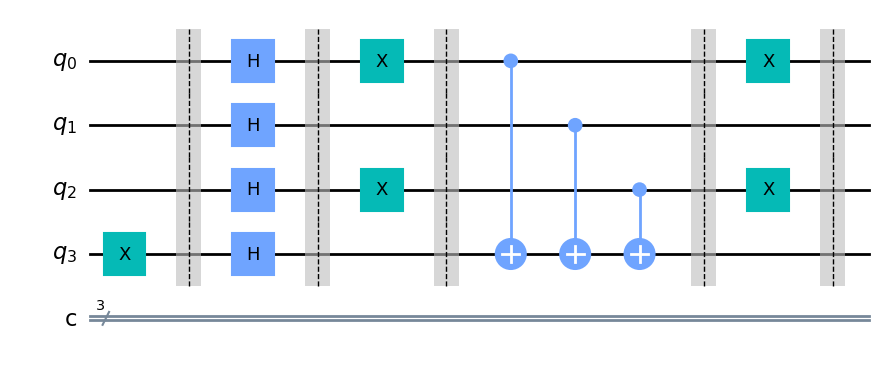

In [31]:
# generemos un circuito con el oráculo constante
dj_circ_constante = dj_oraculo(dj_circuit, 'constante')

# generemos un circuito con el oráculo balanceado
dj_circ_balanceado = dj_oraculo(dj_circuit, 'balanceado')


dj_circ_balanceado.draw('mpl')

#### Paso 4

En este punto, el segundo registro (de un qubit en el estado $\ket{-}$) puede ser ignorado, pues solo interesan las mediciones del primer registro, el estado en el que nos fijaremos es el siguiente,

$$\frac{1}{\sqrt{2^n}}\sum_{x=0}^{2^n-1} \, \big(-1\big)^{f(x)} \, \ket{x}$$

Se aplican compuertas Hadamard a cada qubits del primer registro,

$$
\begin{aligned}
\ket{\psi_3}&=\frac{1}{2^{n}}\sum_{x=0}^{2^n-1} \, \big(-1\big)^{f(x)} \, \left[\sum_{j=0}^{2^n-1} \, \big(-1\big)^{x\cdot j} \, \ket{j} \right]\\
&=\frac{1}{2^{n}}\sum_{j=0}^{2^n-1} \, \left[\sum_{x=0}^{2^n-1} \, \big(-1\big)^{f(x)} \big(-1\big)^{x\cdot j}\right] \, \ket{j}\\
\end{aligned}
$$

donde $x\cdot j=x_0j_0\oplus x_1j_1\oplus \cdots\oplus x_{n-1}j_{n-1}$ es la suma del producto bit a bit.

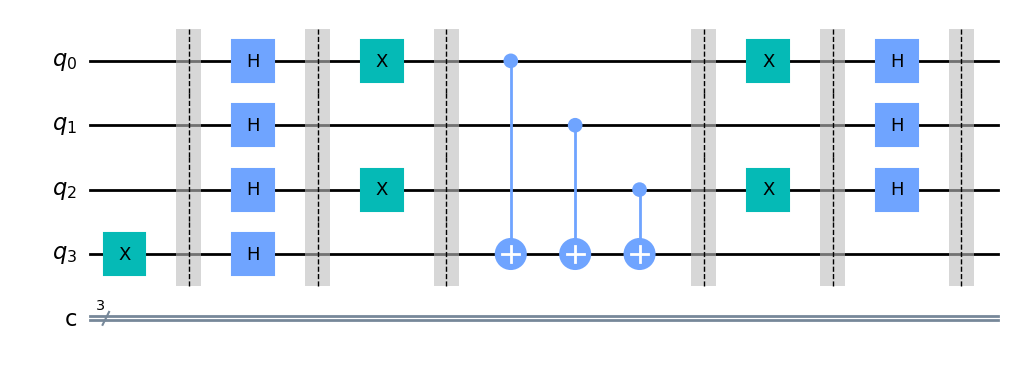

In [32]:
#---------------------
## Oráculo Balanceado
#---------------------

# Aplicar nuevaente compuertas H al primer registro (en el circuito que ya tienen el oráculo)
for qubit in range(n):
    dj_circ_balanceado.h(qubit)
    
dj_circ_balanceado.barrier()
dj_circ_balanceado.draw('mpl')

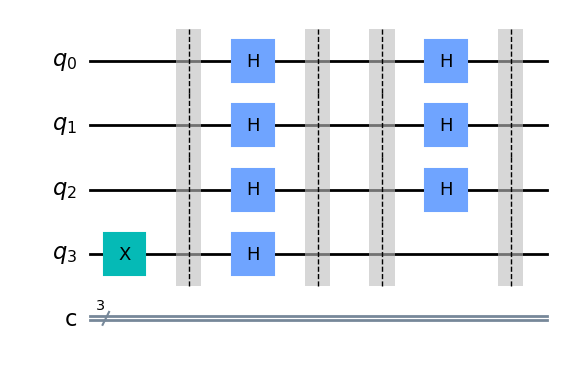

In [33]:
#---------------------
## Oráculo Constante
#---------------------

# Aplicar nuevaente compuertas H al primer registro (en el circuito que ya tienen el oráculo)
for qubit in range(n):
    dj_circ_constante.h(qubit)

dj_circ_constante.barrier()
dj_circ_constante.draw('mpl')

#### Paso 5

Medir el primer registro.

Notemos que la probabilidad para que un estado $\ket{k}$ sea medido, está dada por,

$$\left|\frac{1}{2^{n}}\sum_{x=0}^{2^n-1} \, \big(-1\big)^{f(x)} \big(-1\big)^{x\cdot k}\right|^2$$

En particular para el caso $k=0$, o escrito en forma de estado cuántico: $\ket{k}=\ket{0}^{\otimes n}$, la probabilidad sería,

$$\left|\frac{1}{2^{n}}\sum_{x=0}^{2^n-1} \, \big(-1\big)^{f(x)} \right|^2$$

que será igual a $1$ si $f(x)$ es **constante** (habrá interferencia constructiva), e igual a $0$ si $f(x)$ es balanceada (habrá interferencia destructiva).

$$$$

En otras palabras, la medición final será $\ket{0}^{\otimes n}$ (es decir, todos ceros) si $f(x)$ es constante, y se obtendrá cualquier otro estado si $f(x)$ es balanceada.

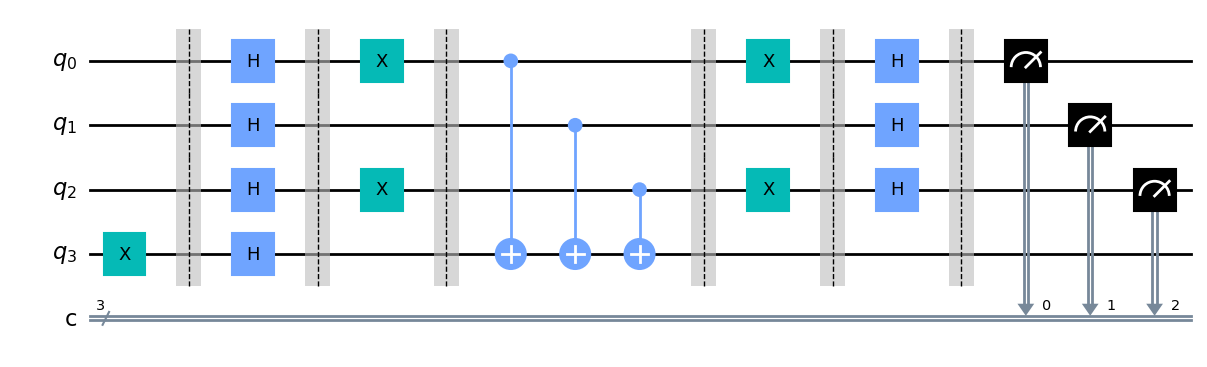

In [34]:
#---------------------
## Oráculo Balanceado
#---------------------

# agregamos mediciones al primer registro
for i in range(n):
    dj_circ_balanceado.measure(i, i)
    
dj_circ_balanceado.draw('mpl')

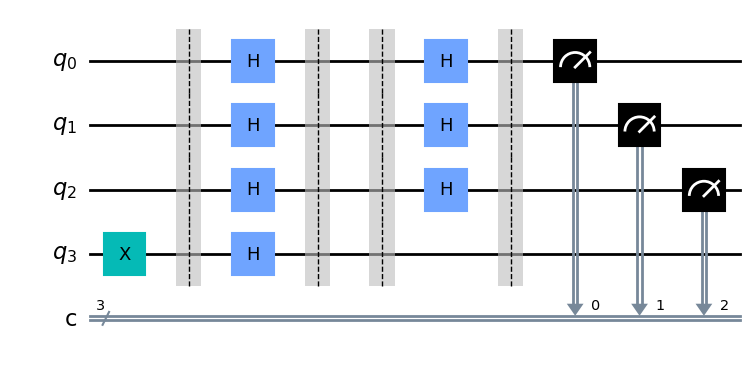

In [35]:
#---------------------
## Oráculo Constante
#---------------------

# agregamos mediciones al primer registro
for i in range(n):
    dj_circ_constante.measure(i, i)
    
dj_circ_constante.draw('mpl')

**Nota**: El orden de los qubits en el código en Qiskit está invertido respecto al orden en la expresiones matemáticas, pero esto no repreenta un problema en los resultados, todo funciona como es esperado, solo se debe tener cuidado al mapear lo definido matemáticamente con lo implementado en código.

#### Ejecución

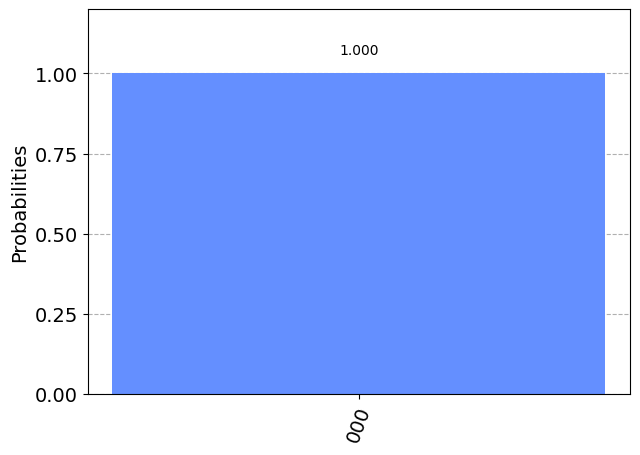

In [36]:
from qiskit import Aer

aer_sim = Aer.get_backend('aer_simulator')


#---------------------
## Oráculo Constante
#---------------------

results = aer_sim.run(dj_circ_constante).result()
respuesta = results.get_counts()

plot_histogram(respuesta)

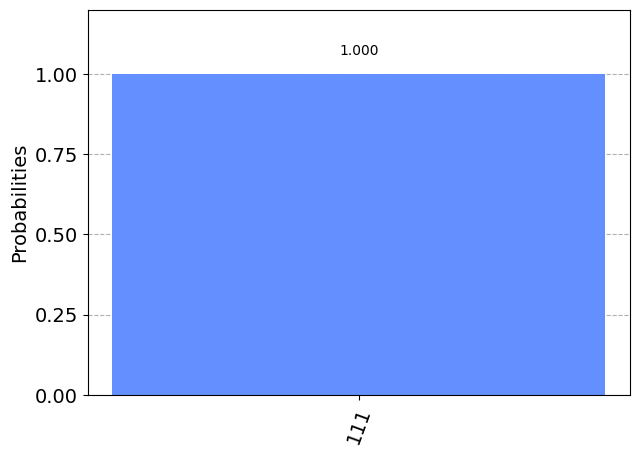

In [37]:
#---------------------
## Oráculo Balanceado
#---------------------

results = aer_sim.run(dj_circ_balanceado).result()
respuesta = results.get_counts()

plot_histogram(respuesta)

<a id="2.3.4"></a>
### 2.C.d. ¿Por qué funciona?

#### Oráculo Constante

Cuando el oráculo es constante, no tiene efecto (hasta una fase global) en los qubits de entrada, y los estados cuánticos antes y después de consultar el oráculo son los mismos. Dado que la compuerta $H$ es su propio inverso, en el *paso 4* invertimos el *paso 2* para obtener el estado cuántico inicial $\ket{00\cdots 0}$ en el primer registro.

$$H^{\otimes n}\mymatrix{r}{ 1 \\ 0 \\ 0 \\ \vdots \\ 0 }=\frac{1}{\sqrt{2^n}}\mymatrix{r}{ 1 \\ 1 \\ 1 \\ \vdots \\ 1 }\xrightarrow{\text{después de } U_f}H^{\otimes n}\frac{1}{\sqrt{2^n}}\mymatrix{r}{ 1 \\ 1 \\ 1 \\ \vdots \\ 1 }=\mymatrix{r}{ 1 \\ 0 \\ 0 \\ \vdots \\ 0 }$$

$$$$
$$$$

#### Oráculo Balanceado

Después del *paso 2*, el registro de entrada es una superposición igual de todos los estados en la base computacional. Cuando el oráculo es balanceado, el [retroceso de fase (phase kickback)](https://qiskit.org/textbook/ch-gates/phase-kickback.html) agrega una fase negativa a exactamente la mitad de estos estados:

$$U_f\frac{1}{\sqrt{2^n}}\mymatrix{r}{ 1 \\ 1 \\ 1 \\ \vdots \\ 1 }=\frac{1}{\sqrt{2^n}}\mymatrix{r}{ -1 \\ 1 \\ -1 \\ \vdots \\ 1 }$$

El estado cuántico después de consultar el oráculo es ortogonal al estado cuántico antes de consultar el oráculo. Por lo tanto, en el *paso 4*, al aplicar las compuertas H, debemos terminar con un estado cuántico que sea ortogonal a $\ket{00\cdots 0}$. Esto significa que nunca debemos medir el estado cero.

<a id="2.4"></a>
## 2.D. Algoritmo de Grover

Probablemente hayas escuchado que una de las muchas ventajas que tiene una computadora cuántica sobre una computadora clásica es su base de datos de búsqueda de velocidad superior. El **algoritmo de Grover** demuestra esta capacidad. Este algoritmo puede acelerar cuadráticamente un problema de búsqueda no estructurado, pero sus usos van más allá; puede servir como un truco o subrutina general para obtener mejoras de tiempo de ejecución cuadráticas para una variedad de otros algoritmos. Esto se llama el truco de **amplificación de amplitud**.

Supongamos que tenemos una gran lista de $N$ elementos. Entre estos artículos hay uno con una propiedad única que deseamos localizar; llamaremos a este el ganador $\omega$. Pensemos en cada elemento de la lista como un cuadro de un color particular. Digamos que todos los elementos de la lista son grises excepto el ganador $\omega$, que es morado.

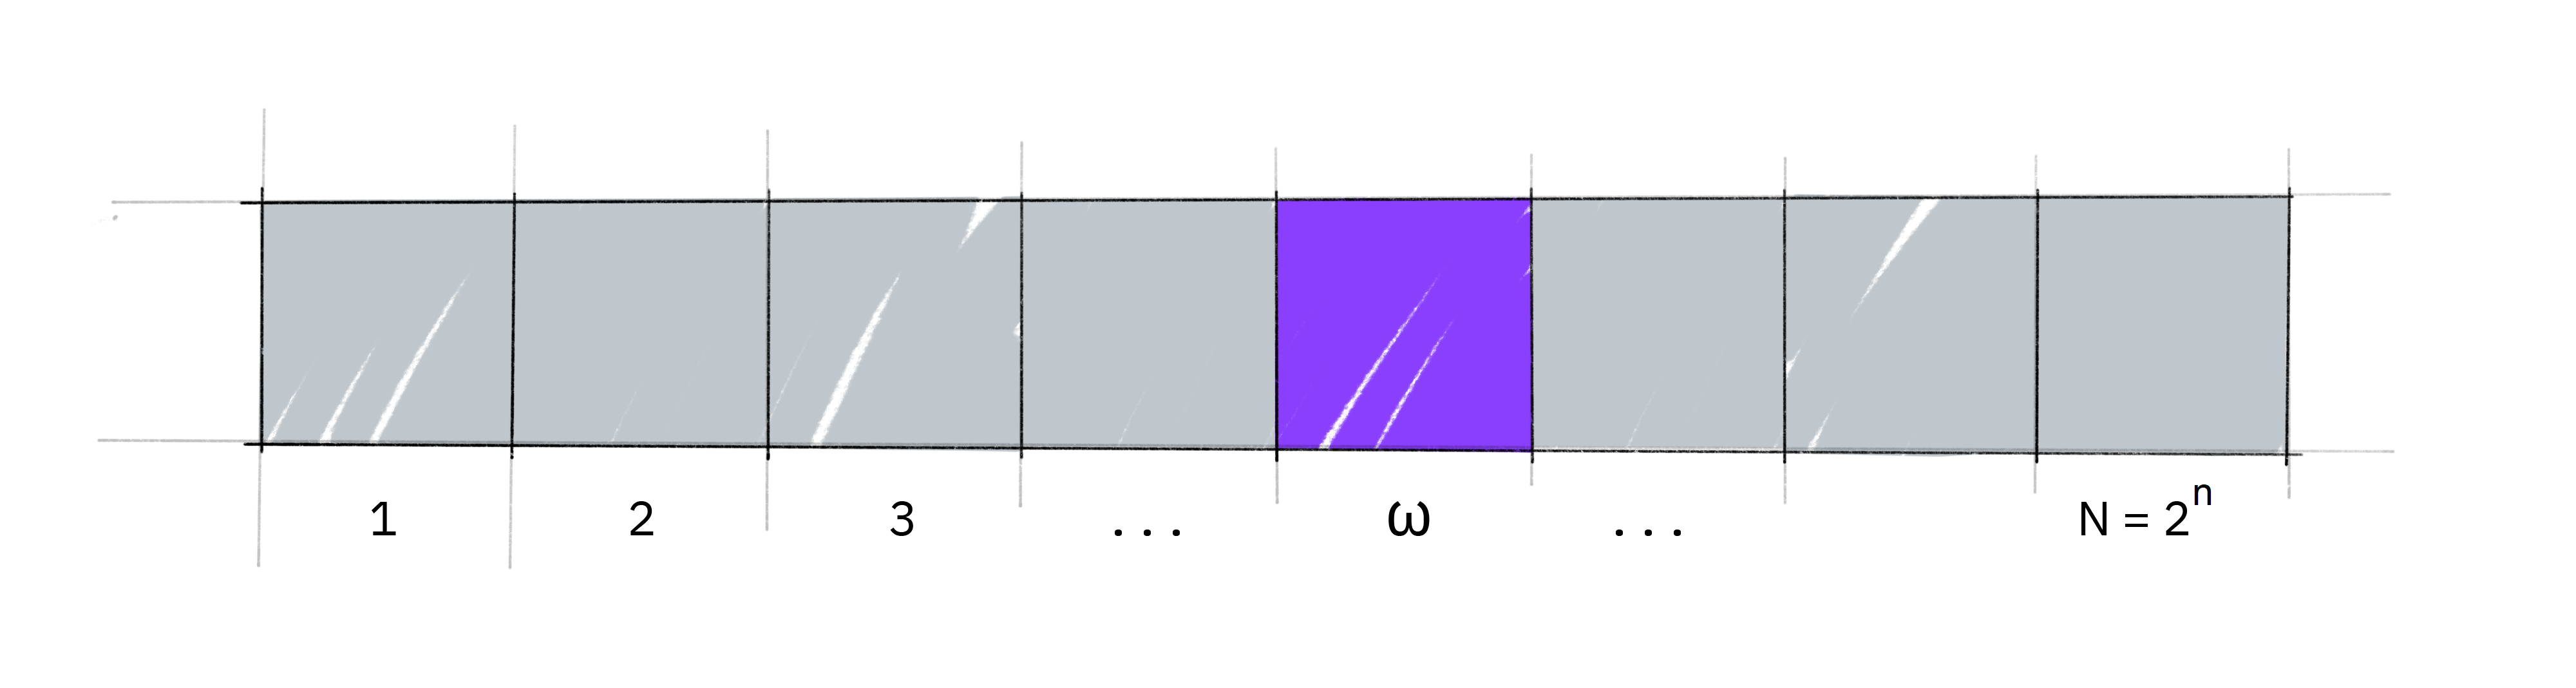

<p style="font-size:10px;font-style:italic;text-align:right"><a href="https://learn.qiskit.org/course/ch-algorithms/grovers-algorithm" target="_blank">Imagen obtenida del Qiskit Textbook</a></p>

Para encontrar el cuadro morado, el elemento marcado, utilizando un algritmo clásico, se tendrían que marcar en promedio $N/2$ cuadros y, en el peor de los casos, todos los $N$ cuadros. En una computadora cuántica, sin embargo, podemos encontrar el elemento marcado en aproximadamente $\sqrt{N}$ pasos con el truco de *amplificación de amplitud de Grover*. Una aceleración cuadrática es de hecho un ahorro de tiempo sustancial para encontrar elementos marcados en listas largas. Además, el algoritmo no utiliza la estructura interna de la lista, lo que la hace genérica; por eso proporciona inmediatamente una aceleración cuántica cuadrática para muchos problemas clásicos.

$$$$

El algoritmo de Grover consta de tres pasos principales: **preparación del estado**, el **oráculo** y el **operador de difusión**. 

La preparación del estado es donde creamos el *espacio de búsqueda*, que son todos los casos posibles que podría tomar la respuesta. En el ejemplo de la lista que mencionamos anteriormente, el espacio de búsqueda serían todos los elementos de esa lista. El *oráculo* es el que marca la respuesta correcta, o respuestas que estamos buscando, y el *operador de difusión* magnifica estas respuestas para que se destaquen y se midan al final del algoritmo.

<a id="2.4.1"></a>
### 2.D.a. ¿Cómo funciona?

Antes de mirar la lista de artículos, no tenemos idea de dónde está el que está marcado. Por lo tanto, cualquier suposición de su ubicación es tan buena como cualquier otra, que se puede expresar en términos de una superposición uniforme:

$$\ket{s}=\frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}\ket{x}$$

Si en este punto tuviéramos que medir en la base estándar $\{\ket{x}\}$, esta superposición colapsaría, a cualquiera de los estados de la base con la misma probabilidad de $\frac{1}{N}=\frac{1}{2^n}$. Nuestras posibilidades de adivinar el valor correcto $\omega$ son, por lo tanto, $1$ en $2^n$, como era de esperar. Por lo tanto, en promedio, tendríamos que intentarlo unas $N/2=2^{n-1}$ veces para adivinar el elemento correcto.

Ahora se inicia al procedimiento llamado *amplificación de amplitud*, que es como una computadora cuántica mejora significativamente esta probabilidad. Este procedimiento extiende (amplifica) la amplitud del elemento marcado, lo que reduce la amplitud de los otros elementos, de modo que al colapsar el estado final, se medirá el elemento correcto casi con certeza.

Este algoritmo tiene una interpretación geométrica en términos de dos reflexiones, que generan una rotación en un plano bidimensional. Los únicos dos estados especiales que necesitamos considerar son el ganador $\ket{w}$ y la superposición uniforme $\ket{s}$. Estos dos vectores generan un plano bidimensional en el espacio vectorial $\mathbb{C}^N$. No son del todo perpendiculares porque $\omega$ ocurre en la superposición con amplitud $N^{1/2}$ también. Sin embargo, podemos introducir un estado adicional $\ket{s'}$ que esté en el plano generado por estos dos vectores, que sea perpendicular a $\ket{w}$ y se obtenga de $\ket{s}$ al eliminar $\ket{w}$ y cambiar la escala.

<a id="2.4.2"></a>
### 2.D.b. Paso 1: Prepapar el espacio de búsqueda

El primer paso del algoritmo de Grover es la **preparación del estado inicial**. El espacio de búsqueda son todos los valores posibles que necesitamos buscar para encontrar la respuesta que queremos. 

Una 'base de datos' se compone de todos los posibles estados de la base computacional en los que pueden estar nuestros qubits. Por ejemplo, si tenemos 3 qubits, nuestra lista son los estados $\ket{000},\ket{001},\cdots, \ket{111}$ (es decir, los estados $\ket{0}, \ket{1}, \cdots, \ket{7}$). Entonces, en este caso, el tamaño de nuestro espacio de búsqueda será $N=2^3=8$.

En algunos casos, si conocemos el rango dentro del espacio de búsqueda donde se garantiza la respuesta, podemos eliminar la base redundante de nuestro espacio de búsqueda para acelerar el algoritmo y disminuir el tamaño del circuito. En términos generales, podemos preparar nuestro estado utilizando cualquier estado simétrico (invariante sobre cualquier permutación), como [estados GHZ](https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state), [estados W](https://en.wikipedia.org/wiki/W_state) o [estados Dicke](https://en.wikipedia.org/wiki/Dicke_model).

$$$$

El procedimiento de amplificación de amplitud comienza en la superposición uniforme $\ket{s}$, que se construye fácilmente a partir de $\ket{s}=H^{\otimes n}\ket{0}^{\otimes n}$ o utilizando otros estados entrelazados simétricos.

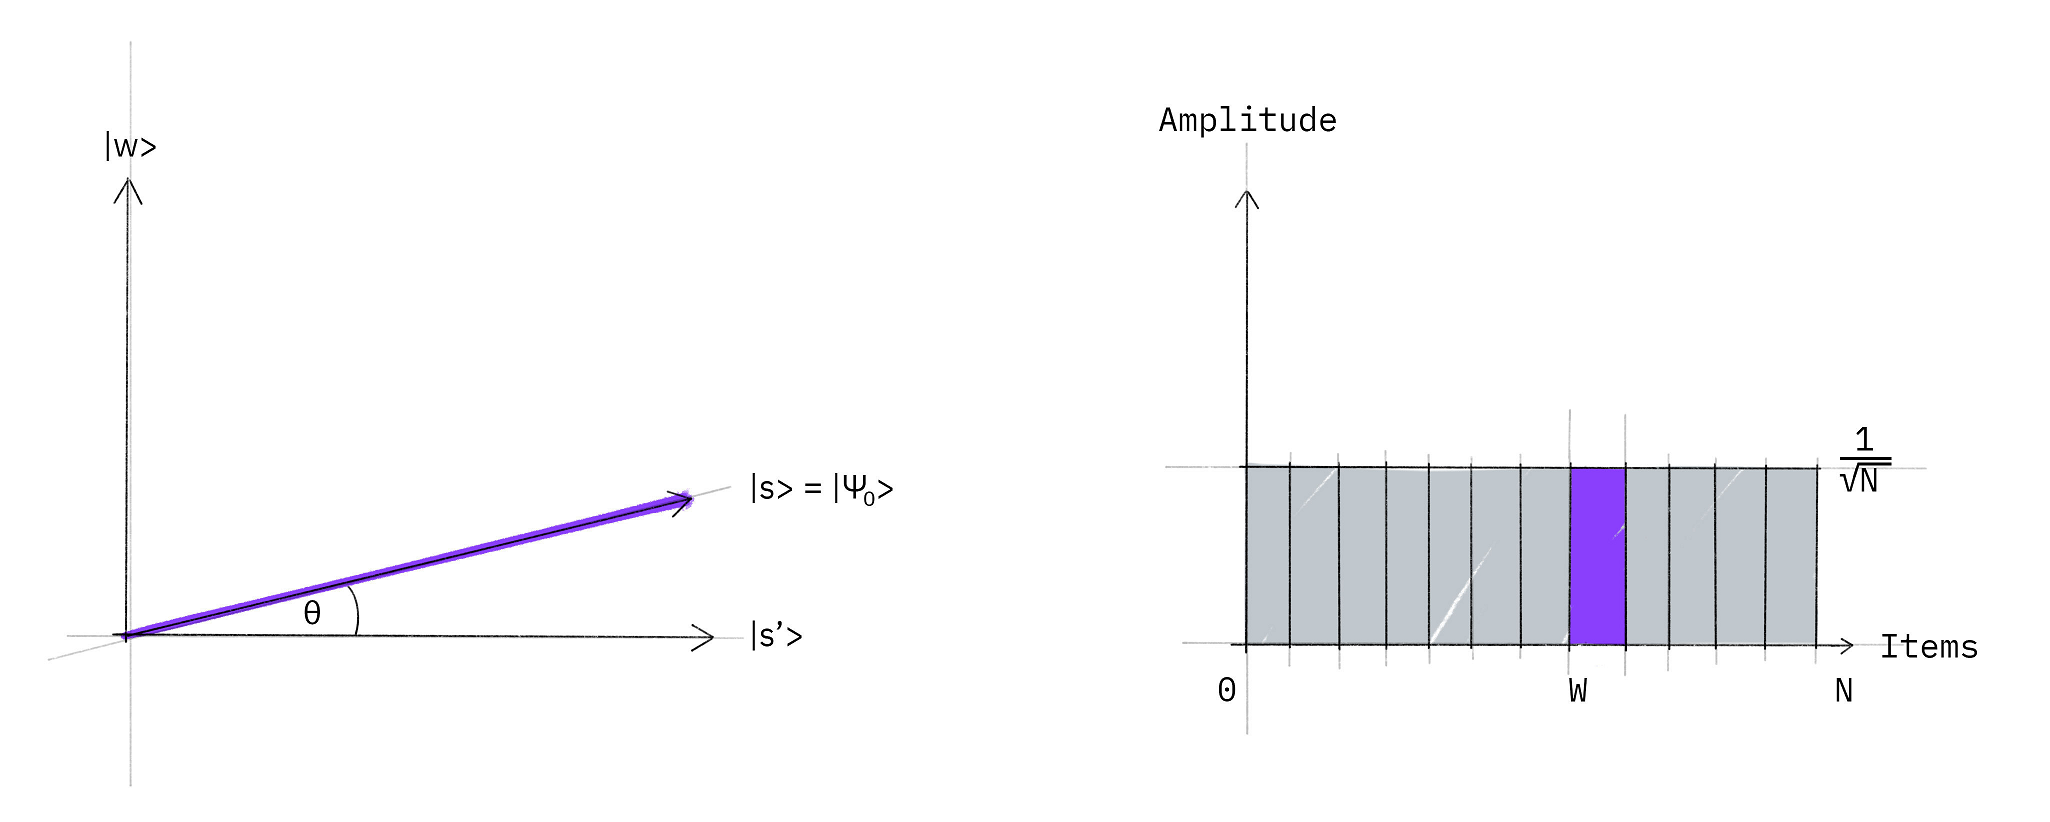

<p style="font-size:10px;font-style:italic;text-align:right"><a href="https://learn.qiskit.org/course/ch-algorithms/grovers-algorithm" target="_blank">Imagen obtenida del Qiskit Textbook</a></p>

La gráfica de la izquierda corresponde al plano bidimensional generado por los vectores perpendiculares $\ket{w}$ y $\ket{s'}$ que permite expresar el estado inicial como 

$$\ket{s}=\sin\theta\ket{w}+\cos\theta\ket{s'}$$

donde $\theta=\arcsin\braket{s}{w}=\arcsin\frac{1}{\sqrt{N}}$. 

La gráfica de barras de la derecha muestra las amplitudes del estado $\ket{s}$.

Para escribir el código de Qiskit, tomaremos el ejemplo de $2$ qubits, entonces $N=4$. En este caso particular, solo se requiere una rotación para mover el estado inicial $\ket{s}$ al estado ganador $\ket{w}$. Entonces, tenemos que,

$$\theta = \arcsin\frac{1}{2}=\frac{\pi}{6}$$



In [38]:
from qiskit import QuantumCircuit

n = 2

grover_circuit = QuantumCircuit(n)

In [39]:
def initialize_s(qc, qubits):
    # Aplicar una compuerta H a los 'qubits' in qc
    for q in qubits:
        #
    return qc

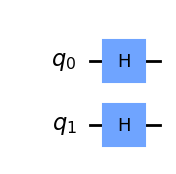

In [40]:
grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.draw('mpl')

<a id="2.4.3"></a>
### 2.D.c. Paso 2: Crear el oráculo

El segundo y más importante de los pasos del algoritmo de Grover es el oráculo. Los oráculos agregan una fase negativa a los estados de la solución para que puedan destacarse del resto y medirse. Es decir, para cualquier estado $\ket{x} en la base computacional:

$$
U_\omega\ket{x}=\begin{cases}
~~~\ket{x},& \text{si } x\neq \omega\\
-\ket{x},& \text{si } x= \omega
\end{cases}
$$

Este oráculo será una matriz diagonal, donde la entrada que corresponda al elemento marcado tendrá fase negativa. Por ejemplo, si tenemos tres qubits y $\omega=101$, el oráculo tendrá la matriz:

$$
U_\omega = \begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ \end{bmatrix} \begin{aligned} \\ \\ \\ \\ \\ \\ \leftarrow \omega = \text{101}\\ \\ \\ \\ \end{aligned}
$$

Lo que hace que el algoritmo de Grover sea tan poderoso es lo fácil que es convertir un problema en un oráculo de esta forma. Hay muchos problemas computacionales en los que es difícil encontrar una solución, pero relativamente fácil de verificar una solución. Por ejemplo, podemos verificar fácilmente la solución de un [sudoku](https://en.wikipedia.org/wiki/Sudoku) verificando que se cumplan todas las reglas. Para estos problemas, podemos crear una función $f$ que tome una solución propuesta $x$ y devuelva $f(x)=0$ si $x$ no es una solución ($\omega\neq x$) y $f(x)=1$ para una solución válida ($\omega = x$). Nuestro oráculo puede entonces ser descrito como:

$$U_\omega\ket{x}=\big(-1\big)^{f(x)}\ket{x}$$

y la matriz del oráculo será la matriz diagonal de la forma:

$$U_\omega = \begin{bmatrix} (-1)^{f(0)} &   0         & \cdots &   0         \\ 0           & (-1)^{f(1)} & \cdots &   0         \\ \vdots      &   0         & \ddots & \vdots      \\ 0           &   0         & \cdots & (-1)^{f(2^n-1)} \\ \end{bmatrix} $$

$$$$

Entonces cuando aplicamos el oráculo de reflexión $U_\omega$ al estado $\ket{s}$, observamos que,

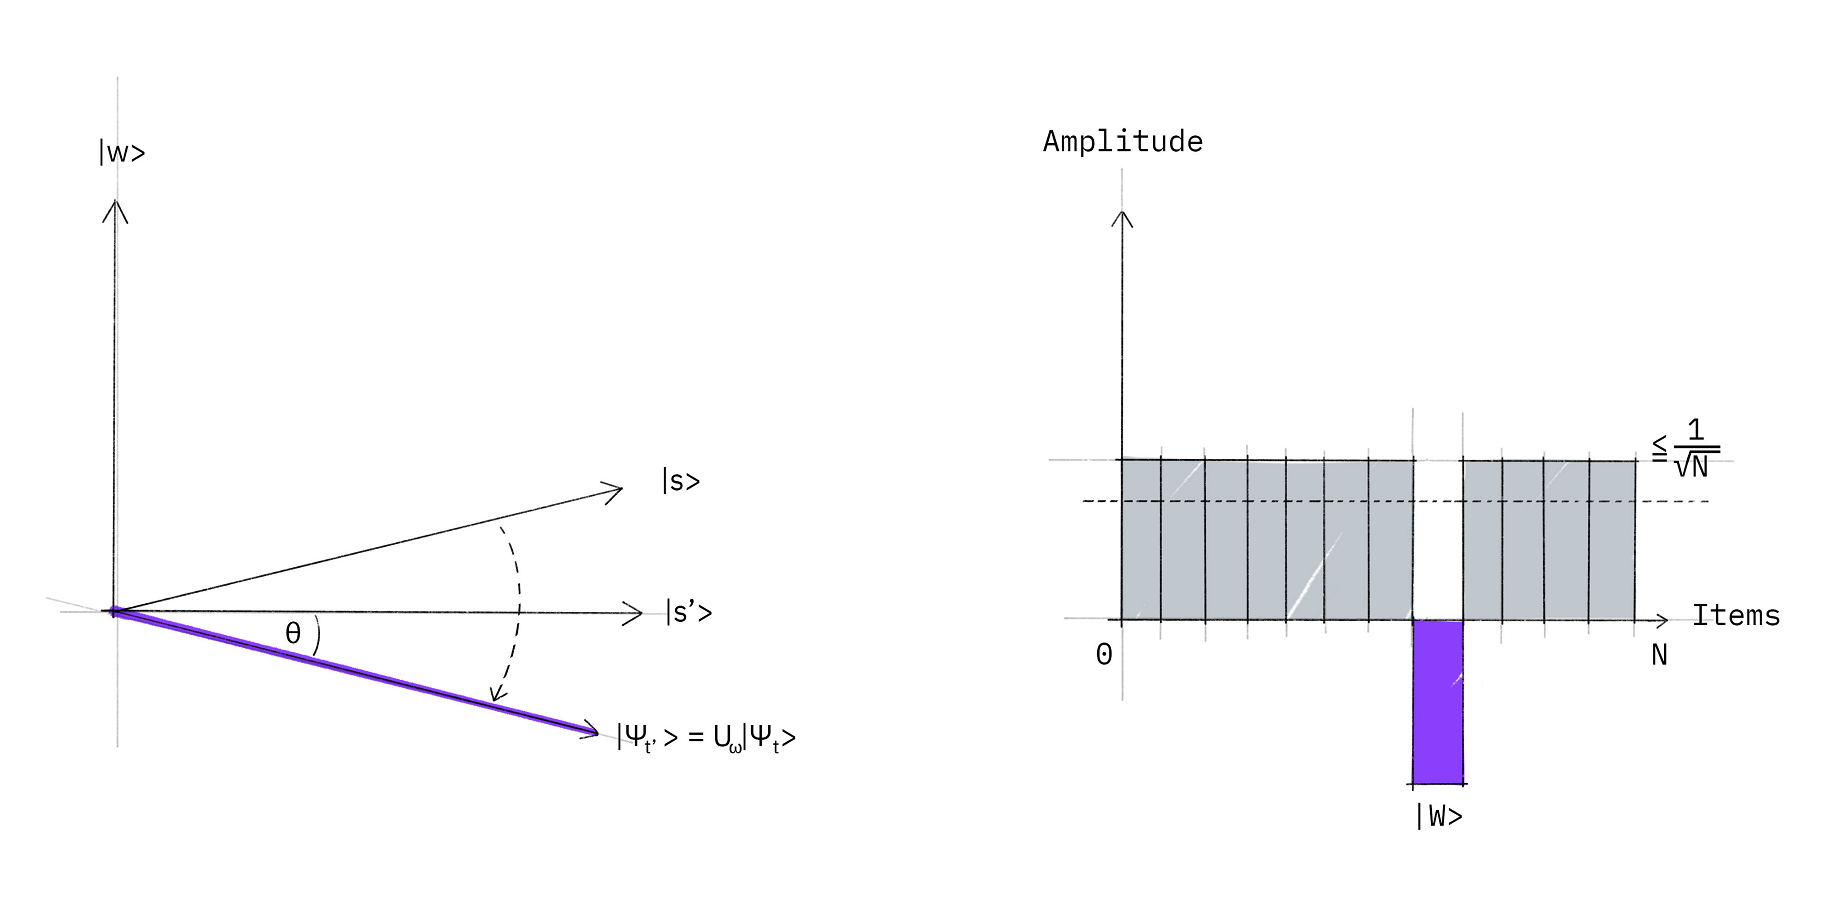

<p style="font-size:10px;font-style:italic;text-align:right"><a href="https://learn.qiskit.org/course/ch-algorithms/grovers-algorithm" target="_blank">Imagen obtenida del Qiskit Textbook</a></p>

Geométricamente esto corresponde a un reflejo del estado $\ket{s}$ respecto a $\ket{s'}$. Esta transformación significa que la amplitud frente al estado $\ket{\omega}$ se vuelve negativa, lo que a su vez significa que la amplitud promedio (indicada por una línea discontinua) se ha reducido.

Para nuestro ejemplo de $2$ qubits, usemos un orácuo que marque el estado $\ket{\omega}=\ket{11}$.

Entonces el oráculo $U_\omega$ en este caso actúa como sigue,

$$U_\omega\ket{s}=U_\omega\frac{1}{2}\big(\ket{00}+\ket{01}+\ket{10}+\ket{11}\big)=\frac{1}{2}\big(\ket{00}+\ket{01}+\ket{10}-\ket{11}\big)$$

$$U_{\omega}=\mymatrix{rr}{ 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1 }$$

El cual se puede reconocer como la compuerta $Z$ controlada. Por lo tanto, para este ejemplo, nuestro oráculo es simplemente la compuerta $Z$ controlada:

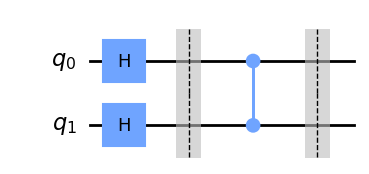

In [41]:
grover_circuit.barrier()
grover_circuit.cz(0,1) # oráculo
grover_circuit.barrier()

grover_circuit.draw('mpl')

<a id="2.4.4"></a>
### 2.D.d. Paso 3: Operador de difusión

Finalmente, después de que el oráculo haya marcado la respuesta correcta haciéndola negativa, el último paso del algoritmo de Grover es el operador de difusión.

La construcción del operador de difusión depende de lo que decidamos usar para preparar nuestros estados iniciales. Generalmente, el operador de difusión tiene la siguiente construcción.

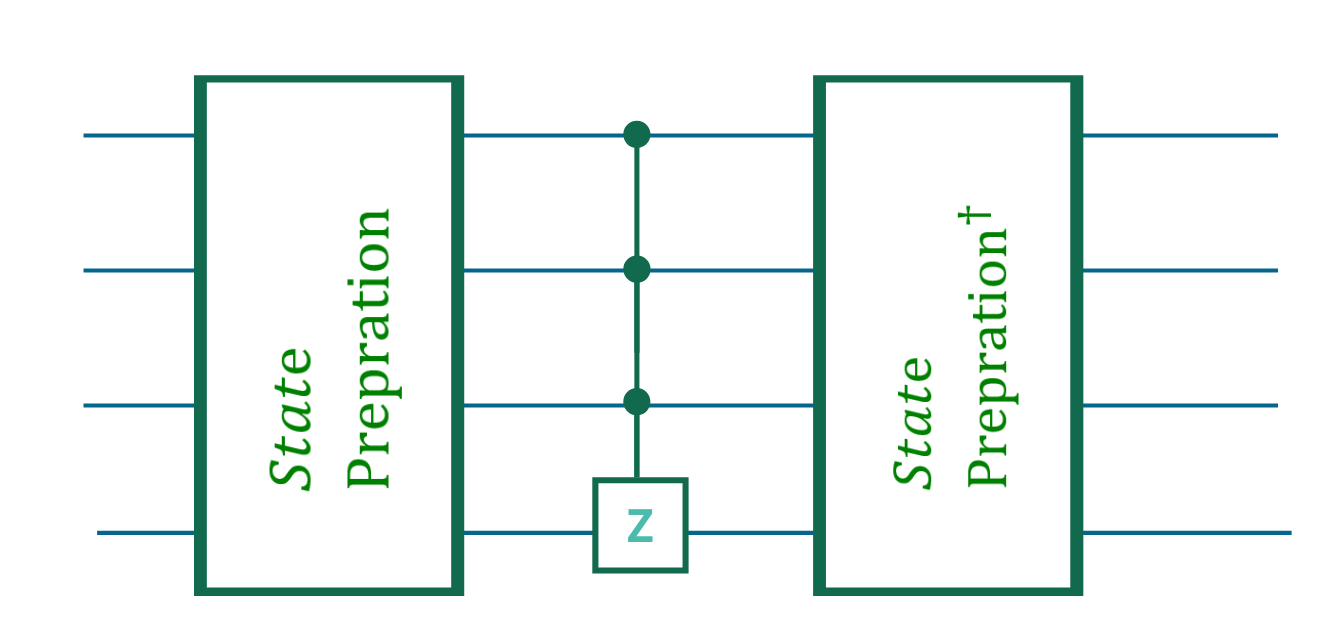

<p style="font-size:10px;font-style:italic;text-align:right"><a href="https://learn.qiskit.org/course/ch-algorithms/grovers-algorithm" target="_blank">Imagen obtenida del Qiskit Textbook</a></p>

Este operador de difusión $U_s$ es una reflexión adicional respecto al estado $\ket{s}$:

$$U_s=2\ket{s}\bra{s}-\mathbb{1}$$

Esta transformación mapeael estado a $U_sU_f\ket{s}$ y completa la amplificación.

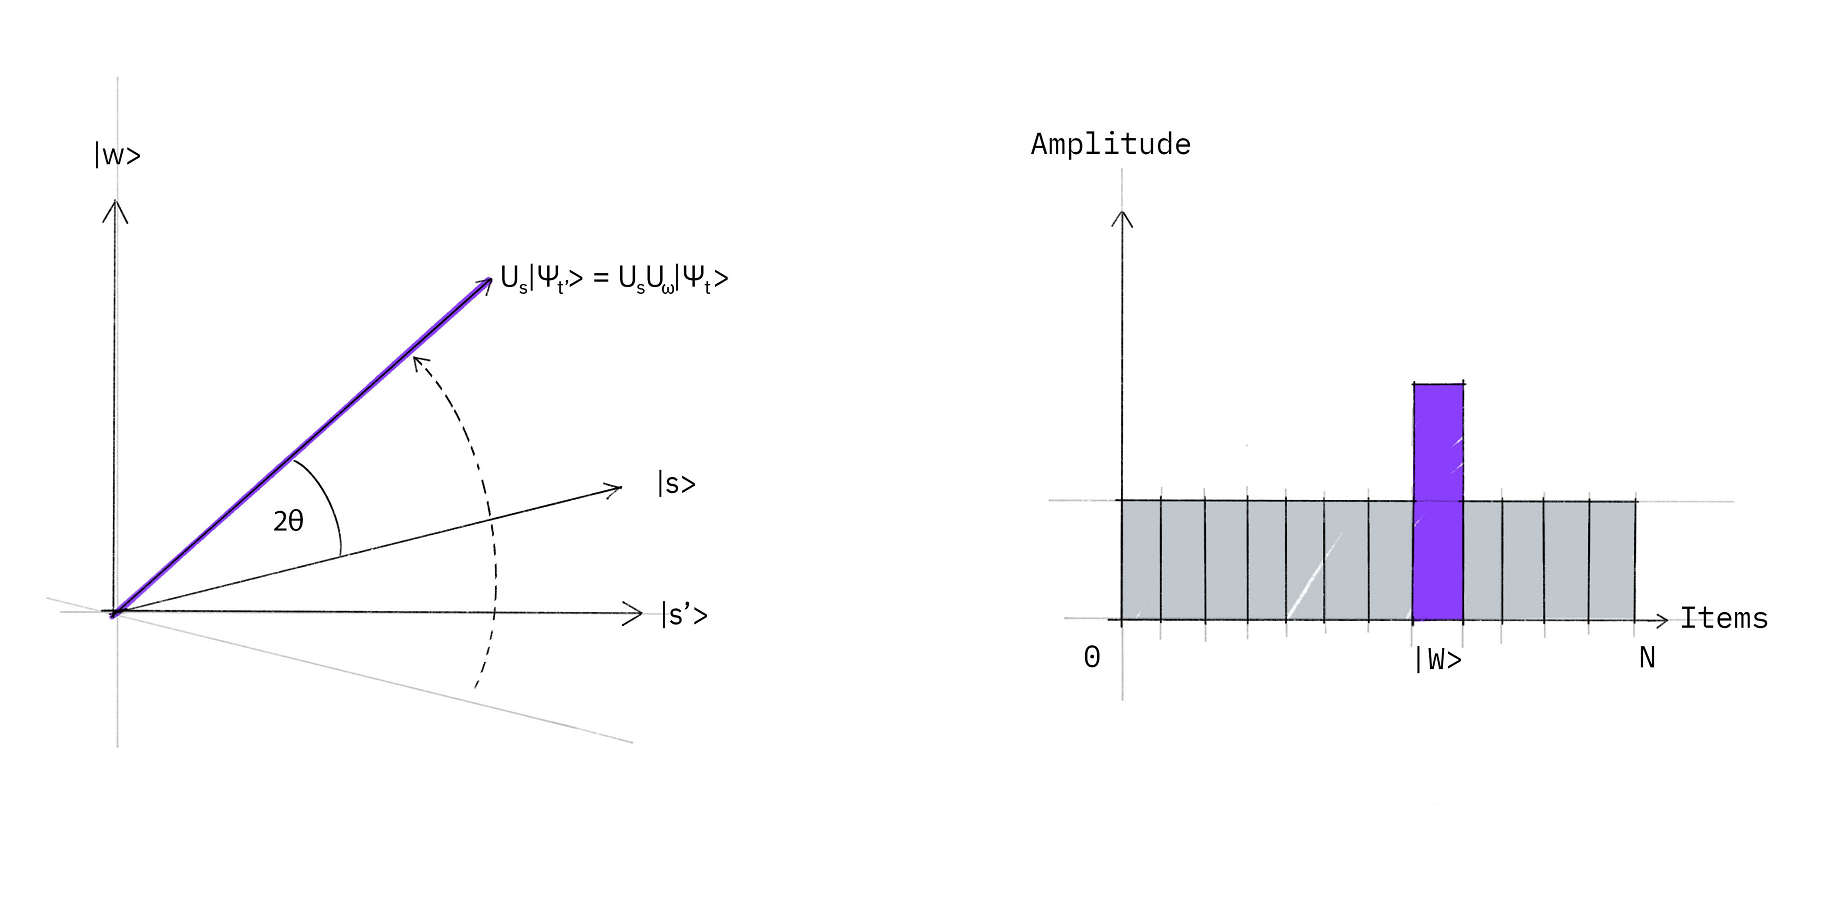

<p style="font-size:10px;font-style:italic;text-align:right"><a href="https://learn.qiskit.org/course/ch-algorithms/grovers-algorithm" target="_blank">Imagen obtenida del Qiskit Textbook</a></p>

Dos reflexiones siempre corresponden a una rotación. La transformación $U_sU_f$ gira el estado inicial $\ket{s}$ más cerca del estado ganador $\ket{w}$. La acción de la reflexión $U_s$ en el diagrama de barras de amplitud puede entenderse como una reflexión sobre la amplitud media. Dado que la amplitud promedio se ha reducido por la primera reflexión, esta transformación aumenta la amplitud negativa de $\omega$ aproximadamente tres veces su valor original, mientras que disminuye las otras amplitudes. Luego vamos al paso 2 para repetir la aplicación. Este procedimiento se repetirá varias veces para destacar lo suficiente al estado ganador.

Después de $t$ repeticiones estaremos en el estado $\ket{\psi_t}$ que está dado como,

$$\big(U_sU_f\big)^t\ket{s}$$

¿Cuántas veces necesitamos aplicar la rotación? Resulta que son suficientes aproximadamente $\sqrt{N}$ rotaciones.

Para calcular el número de rotaciones necesitamos saber el tamaño del espacio de búsqueda y el número de respuestas que buscamos. Para obtener el número óptimo de iteraciones $t$, podemos seguir la ecuación:

$$t=\left\lfloor \frac{\pi}{4}\sqrt{\frac{N}{m}} \right\rfloor$$

donde $N$ es el tamaño del espacio de búsqueda y $m$ es el número de respuestas que queremos.

Entonces, el algoritmo de Grover se ve como:

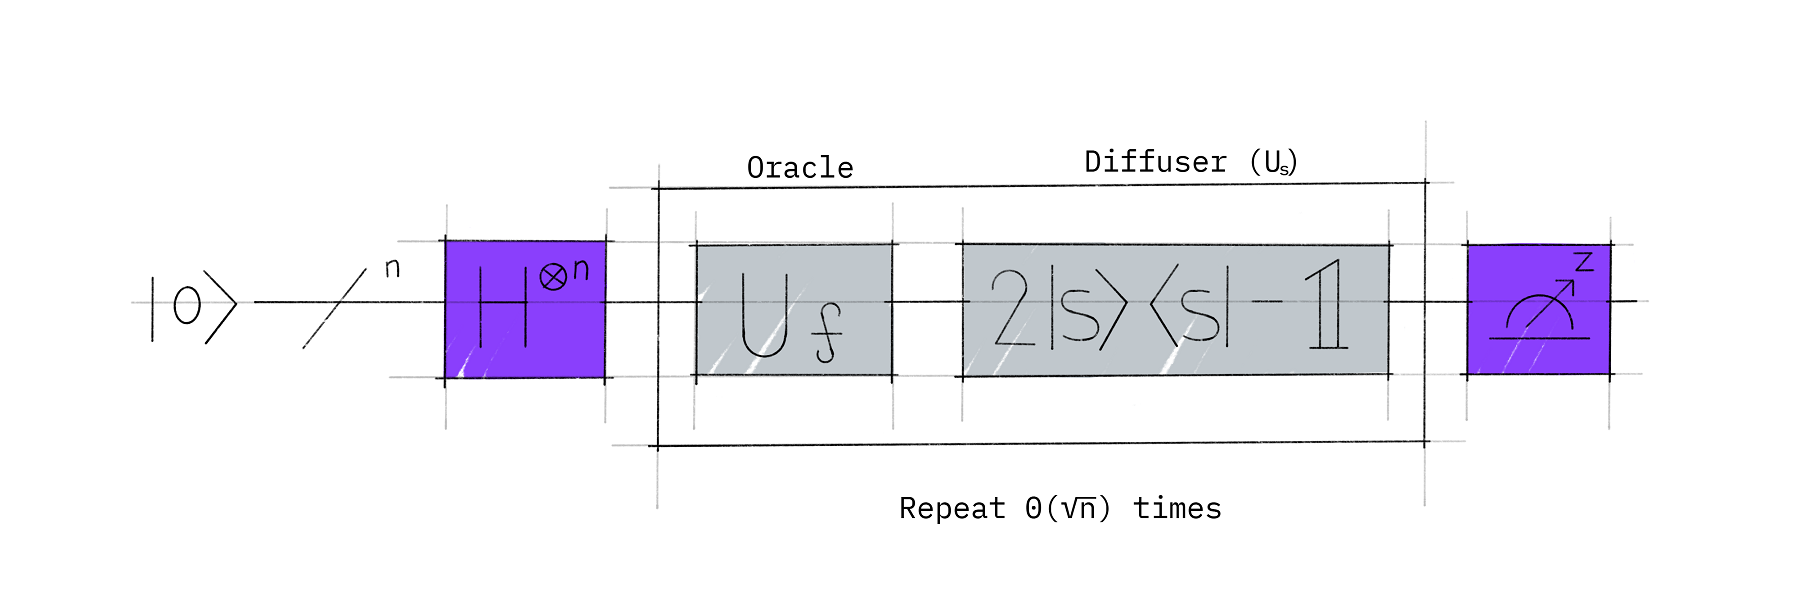

<p style="font-size:10px;font-style:italic;text-align:right"><a href="https://learn.qiskit.org/course/ch-algorithms/grovers-algorithm" target="_blank">Imagen obtenida del Qiskit Textbook</a></p>

Por lo que, después de $t$ pasos, tenemos que

$$\big(U_sU_f\big)^t\ket{s}=\sin\theta_t\ket{\omega}+\cos\theta_t\ket{s'}$$

donde 

$$\theta_t=(2t+1)\theta$$

Para el caso del ejemplo de $2$ qubits, para obtener el estado $\ket{\omega}$, necesitamos $\theta_t=\frac{\pi}{2}$, que con $\theta=\frac{\pi}{6}$ (como ya habíamos determinado), al sustituirlo en la expresión anterior, obtenemos que $t=1$, lo que significa que después de $t=1$ rotaciones, el elemento buscado es encontrado.

Aplicar el operador de difusión $U_s$ implica agregar una fase negativa a cada estado ortogonal a $\ket{s}$.

Una forma en que podemos hacer esto es usar la operación que transforma el estado $\ket{s}\rightarrow\ket{0}$, que ya sabemos que es la compuerta de Hadamard aplicada a cada qubit,

$$H^{\otimes n}\ket{s}\ket{0}$$

Luego aplicamos un circuito que suma una fase negativa a los estados ortogonales a $\ket{0}$,

$$U_0\frac{1}{2}\big(\ket{00}+\ket{01}+\ket{10}+\ket{11}\big)=\frac{1}{2}\big(\ket{00}-\ket{01}-\ket{10}-\ket{11}\big)$$

es decir, los sognos de cada elemento están invertidos, excepto para el caso de $\ket{00}$. Es fácil de verificar que una manera de implementar $U_0$ es al aplicar una compuerta $Z$ a cada qubits y después una compuerta $CZ$.

Finalmente, hacemos la operación que transforma el estado $\ket{0}\rightarrow\ket{1}$ (la compuerta $H$ nuevamente),

$$H^{\otimes n} \, U_0 \, H^{\otimes n}=U_s$$

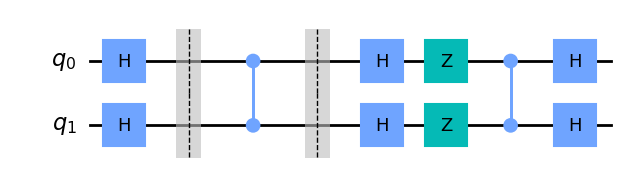

In [42]:
# operador de difusión (U_s)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])

grover_circuit.draw('mpl')

In [43]:
from qiskit import Aer
from qiskit.visualization import array_to_latex

# revisamos el estado al final del circuito

sv_sim = Aer.get_backend('statevector_simulator')

result = sv_sim.run(grover_circuit).result()
statevec = result.get_statevector()
array_to_latex(statevec, prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

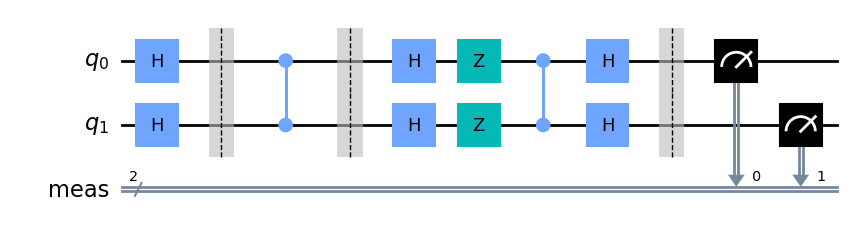

In [44]:
# agregamos las mediciones a todos los qubits
grover_circuit.measure_all()

grover_circuit.draw('mpl')

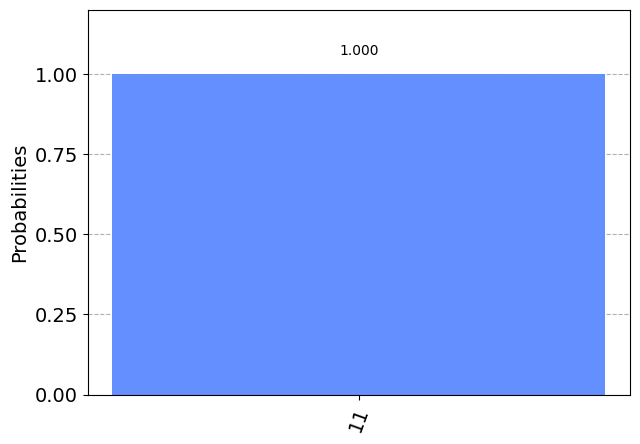

In [45]:
# simulamos la ejecución del circuito

qasm_sim = Aer.get_backend('qasm_simulator')
result = qasm_sim.run(grover_circuit).result()
counts = result.get_counts()
plot_histogram(counts)

<a id="2.4.5"></a>
### 2.D.e. Ejemplo de 3 qubits

In [46]:
# crear el oráculo

qc = QuantumCircuit(3)
qc.cz(0, 2)
qc.cz(1, 2)
oracle_ex3 = qc.to_gate()
oracle_ex3.name = "U$_\omega$"

In [47]:
# función para un difusor general

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Aplicar la transformación |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Aplicar la transformación |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Aplicar múltiples compuertas Z controladas
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # toffoli con multicontrol
    qc.h(nqubits-1)
    # Aplicar la transformación |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Aplicar la transformación |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # Regresar el difusor como compuerta
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

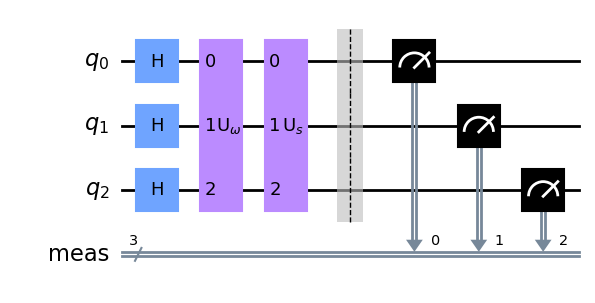

In [48]:
# Ejemplo para circuito de 3 qubits

n = 3
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0, 1, 2])
grover_circuit.append(oracle_ex3, [0, 1, 2])
grover_circuit.append(diffuser(n), [0, 1, 2])
grover_circuit.measure_all()

grover_circuit.draw('mpl')

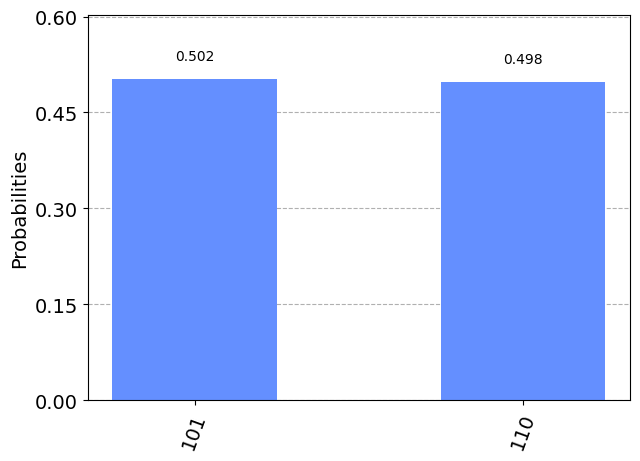

In [49]:
# simulamos la ejecución del circuito

qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_grover_circuit = transpile(grover_circuit, qasm_sim) # necesario para transpilar las compuertas Uw y Us
results = qasm_sim.run(transpiled_grover_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

<a id="2.4.6"></a>
### 2.D.f. Clase `Grover` de Qiskit

Qiskit cuenta con la clase llamada `Grover` que facilita la implementación de este algoritmo, es necesario definir primero el problema con la clase `AmplificationProblem`.

Por ejemplo, veamos el ejercicio que realizamos para $2$ qubits y el estado $\ket{11}$ marcado:

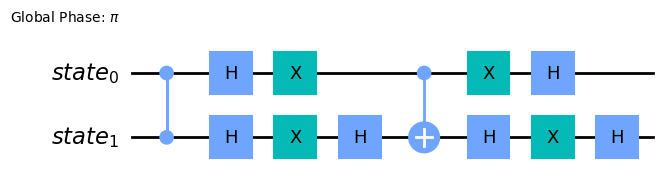

In [50]:
from qiskit.algorithms import AmplificationProblem

# el estado que se desea encontrar '11'
good_state = ['11']

# especificar el oráculo que marca el estado '11' como la solución correcta
oracle = QuantumCircuit(2)
oracle.cz(0, 1)

# definir el algorito de Grover
problem = AmplificationProblem(oracle, is_good_state=good_state)

# veamos el operador Grover que será usado para resolver el problema
problem.grover_operator.decompose().draw(output='mpl')

tipo del resultado: <class 'qiskit.algorithms.amplitude_amplifiers.grover.GroverResult'>

¡Éxito!

Medición más grande: 11


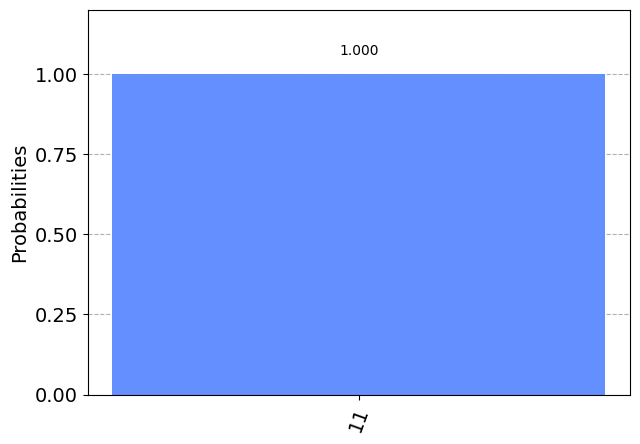

In [51]:
from qiskit.algorithms import Grover

aer_simulator = Aer.get_backend('aer_simulator')
grover = Grover(quantum_instance=aer_simulator)    # definir una instancia de `Grover` con el problema
result = grover.amplify(problem)
print('tipo del resultado:', type(result))
print()
print('¡Éxito!' if result.oracle_evaluation else '¡Falló!')
print()
print('Medición más grande:', result.top_measurement)

plot_histogram(result.circuit_results)

<a id="2.5"></a>
## 2.E. Algoritmo de Shor

El **algoritmo de Shor** es un algoritmo cuántico que sirve para encontrar los factores primos de un número entero. Fue desarrollado en 1994 por el matemático estadounidense [Peter Shor](https://en.wikipedia.org/wiki/Peter_Shor).

El algoritmo de Shor es famoso por factorizar números enteros en **tiempo polinomial**. Dado que el algoritmo clásico más conocido requiere un tiempo superpolinomial para factorizar el producto de dos números primos, el [criptosistema](https://en.wikipedia.org/wiki/Cryptosystem) ampliamente utilizado, [RSA](https://en.wikipedia.org/wiki/RSA_(cryptosystem)), se basa en que la factorización es imposible para números enteros lo suficientemente grandes.

El problema que se trara de resolver es, dado un número compuesto $N$, encontrar un divisor no trivial de $N$ (un divisor estrictamente entre $1$ y $N$). Antes de intentar encontrar dicho divisor, si hay alguna duda de si $N$ es compuesto o primo, uno puede usar algoritmos de prueba de primalidad relativamente rápidos para verificar que $N$ es realmente compuesto, aunque esto no es una parte del algoritmo de Shor.

El algoritmo de Shor consta de dos partes:

- Una reducción, que se puede hacer en una computadora clásica, del problema de factorización al problema de búsqueda de órdenes.
- Un algoritmo cuántico para resolver el problema de búsqueda de órdenes.

<a id="2.5.1"></a>
## 2.E.a. El problema: encontrar el periodo

Veamos la función periódica:

$$f(x)=a^x \, \text{mod} \, N$$

donde $mod$ es la operacion módulo e implica encontrar el resto al dividir un número por otro.

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: Determinar $17 \, \text{mod} \, 5$

Tenemos que $17\div 5 = 3$, lo que nos deja un resto igual a $2$, debido a que $17=(3\times 5)+2$
    
$$$$
    
Este comportamiento se utiliza en la [aritmética modular](https://en.wikipedia.org/wiki/Modular_arithmetic), donde los números se "repiten" después de alcanzar un determinado valor (el módulo). Usando aritmética modular, podríamos escribir:
    
$$17=2  \, (\text{mod}  \,  5)$$
    
Notemos que aquí $(\text{mod} \, 5)$ se aplica a toda la ecuación (ya que está entre paréntesis), a diferencia de la ecuación anterior, donde solo se aplica al lado izquierdo de la misma.

donde $a$ y $N$ son enteros positivos, $a$ es menor que $N$ y no tienen factores comunes. El periodo, u orden ($r$), es el entero más pequeño (distinto de cero) tal que,

$$a^r \, \text{mod} \, N = 1$$

Podemos ver un ejemplo de esta función graficada acontinuación. Se debe tener en cuenta que las líneas entre los puntos (mostraodos con cruces) son para ayudar a ver la periodicidad y no representan los valores intermedios entre los marcadores con cruces.

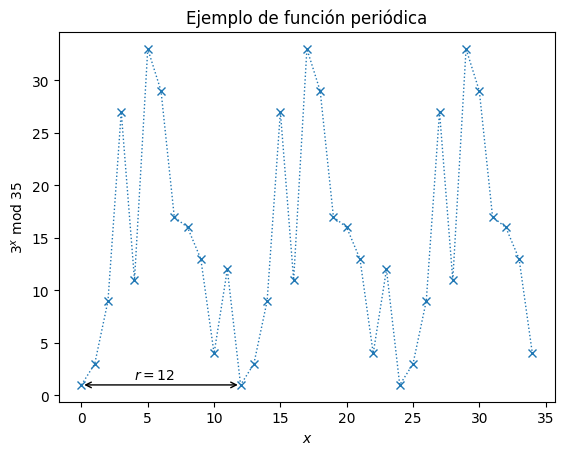

In [52]:
import matplotlib.pyplot as plt


N = 35
a = 3

xvals = range(35)
yvals = [np.mod(a**x, N) for x in xvals]

fig, ax = plt.subplots()
ax.plot(xvals, yvals, linewidth=1, linestyle='dotted', marker='x')
ax.set(xlabel='$x$', ylabel='$%i^x$ mod $%i$' % (a, N), title="Ejemplo de función periódica")

try: # graficar 'r'
    r = yvals[1:].index(1) + 1 
    plt.annotate('', xy=(0, 1), xytext=(r, 1), arrowprops=dict(arrowstyle='<->'))
    plt.annotate('$r=%i$' % r, xy=(r/3, 1.5))
except ValueError:
    print('No se pudo encontrar el período, revisa que a < N y no tengan factores comunes')

<a id="2.5.2"></a>
## 2.E.b. La solución

La solución de Shor fue utilizar la [estimación de fase cuántica](https://en.wikipedia.org/wiki/Quantum_phase_estimation_algorithm) en el operador unitario,

$$U\ket{y}\equiv \ket{ay \, \text{mod} \, N}$$

Para ver cómo esto es útil, averigüemos cómo se vería un estado propio de $U$. Si comenzamos en el estado $\ket{1}$, podemos ver que cada aplicación sucesiva de $U$ multiplicará el estado de nuestro registro por $a \, (\text{mod} \, N)$, y después de $r$ aplicaciones llegaremos nuevamente al estado $\ket{1}$. Por ejemplo con $a=3$ y $N=35$, tenemos que,

$$
\begin{aligned}
U\ket{1}&=\ket{3}\\
U^2\ket{1}&=\ket{9}\\
U^3\ket{1}&=\ket{27}\\
\vdots\\
U^{(r-1)}\ket{1}&=\ket{12}\\
U^r\ket{1}&=\ket{1}\\
\end{aligned}
$$

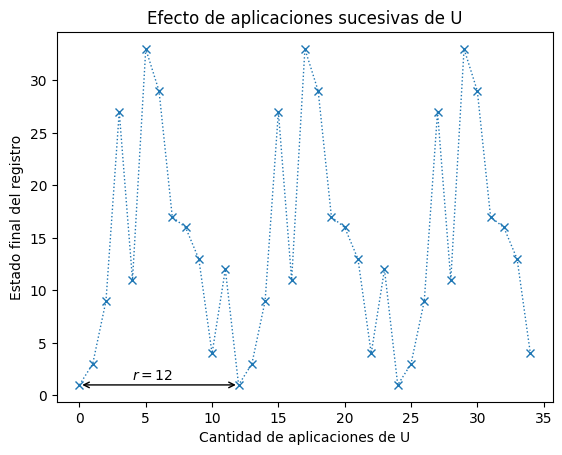

In [53]:
ax.set(xlabel='Cantidad de aplicaciones de U', ylabel='Estado final del registro',
       title="Efecto de aplicaciones sucesivas de U")
fig

Entonces una superposición de los estados en este ciclo ($\ket{u_0}$) sería un estado propio de $U$,

$$\ket{u_0}=\frac{1}{\sqrt{r}}\sum^{r-1}_{k=0} \, \ket{a^k \, \text{mod} \, N}$$

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: con $a=3$ y $N=35$,
    
$$
\begin{aligned}
\ket{u_0}&=\frac{1}{\sqrt{12}}\big(\ket{1}+\ket{3}+\ket{9}+\cdots +\ket{4}+\ket{12}\big)\\
U\ket{u_0}&=\frac{1}{\sqrt{12}}\big(U\ket{1}+U\ket{3}+U\ket{9}+\cdots +U\ket{4}+U\ket{12}\big)\\
&=\frac{1}{\sqrt{12}}\big(\ket{3}+\ket{9}+\ket{27}+\cdots +\ket{12}+\ket{1}\big)\\
&=\ket{u_0}
\end{aligned}
$$

Este estado propio tiene un valor propio de $1$, que no es muy interesante. Un estado propio más interesante podría ser uno en el que la fase sea diferente para cada uno de estos estados básicos computacionales. Específicamente, veamos el caso en el que la fase del $k$-ésimo estado es proporcional a $k$,

$$
\begin{aligned}
\ket{u_1}&=\frac{1}{\sqrt{r}}\sum_{k=0}^{r-1}e^{-\frac{2\pi i k}{r}} \, \ket{a^k \, \text{mod} \, N}\\\\
U\ket{u_1}&=e^{\frac{2 pi i}{r}}\ket{u_1}
\end{aligned}
$$

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: con $a=3$ y $N=35$,
    
$$
\begin{aligned}
\ket{u_1}&=\frac{1}{\sqrt{12}}\big(\ket{1}+e^{-\frac{2\pi i}{12}}\ket{3}+e^{-\frac{4\pi i}{12}}\ket{9}+\cdots +e^{-\frac{20\pi i}{12}}\ket{4}+e^{-\frac{22\pi i}{12}}\ket{12}\big)\\
U\ket{u_1}&=\frac{1}{\sqrt{12}}\big(\ket{3}+e^{-\frac{2\pi i}{12}}\ket{9}+e^{-\frac{4\pi i}{12}}\ket{27}+\cdots +e^{-\frac{20\pi i}{12}}\ket{12}+e^{-\frac{22\pi i}{12}}\ket{1}\big)\\
U\ket{u_1}&=e^{\frac{2\pi i}{12}}\cdot\frac{1}{\sqrt{12}}\big(e^{-\frac{2\pi i}{12}}\ket{3}+e^{-\frac{4\pi i}{12}}\ket{9}+e^{-\frac{6\pi i}{12}}\ket{27}+\cdots +e^{-\frac{22\pi i}{12}}\ket{12}+e^{-\frac{24\pi i}{12}}\ket{1}\big)\\
U\ket{u_1}&=e^{\frac{2\pi i}{12}}\ket{u_1}
\end{aligned}
$$

Este es un valor propio particularmente interesante ya que contiene $r$. De hecho, $r$ debe incluirse para asegurarse de que las diferencias de fase entre los $r$ estados de la base computacional sean iguales. Este no es el único estado propio con este comportamiento; para generalizar esto aún más, podemos multiplicar un número entero, $s$, por esta diferencia de fase, que aparecerá en el valor propio,

$$
\begin{aligned}
\ket{u_s}&=\frac{1}{\sqrt{r}}\sum_{k=0}^{r-1}e^{-\frac{2\pi i s k}{r}} \, \ket{a^k \, \text{mod} \, N}\\\\
U\ket{u_s}&=e^{\frac{2 pi i s}{r}}\ket{u_s}
\end{aligned}
$$

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: con $a=3$ y $N=35$,
    
$$
\begin{aligned}
\ket{u_s}&=\frac{1}{\sqrt{12}}\big(\ket{1}+e^{-\frac{2\pi i s}{12}}\ket{3}+e^{-\frac{4\pi i s}{12}}\ket{9}+\cdots +e^{-\frac{20\pi i s}{12}}\ket{4}+e^{-\frac{22\pi i s}{12}}\ket{12}\big)\\
U\ket{u_s}&=\frac{1}{\sqrt{12}}\big(\ket{3}+e^{-\frac{2\pi i s}{12}}\ket{9}+e^{-\frac{4\pi i s}{12}}\ket{27}+\cdots +e^{-\frac{20\pi i s}{12}}\ket{12}+e^{-\frac{22\pi i s}{12}}\ket{1}\big)\\
U\ket{u_s}&=e^{\frac{2\pi i s}{12}}\cdot\frac{1}{\sqrt{12}}\big(e^{-\frac{2\pi i s}{12}}\ket{3}+e^{-\frac{4\pi i s}{12}}\ket{9}+e^{-\frac{6\pi i s}{12}}\ket{27}+\cdots +e^{-\frac{22\pi i s}{12}}\ket{12}+e^{-\frac{24\pi i s}{12}}\ket{1}\big)\\
U\ket{u_s}&=e^{\frac{2\pi i s}{12}}\ket{u_s}
\end{aligned}
$$

Ahora tenemos un estado propio único para cada valor entero de $s$ donde $0\leq s\leq r-1$. Muy convenientemente, si sumamos todos estos estados propios, las diferentes fases cancelan todos los estados base computacionales excepto $\ket{1}$,

$$\frac{1}{\sqrt{r}}\sum_{k=0}^{r-1} \ket{u_s} = \ket{1}$$

Dado que el estado de base computacional $\ket{1}$ es una superposición de estos estados propios, lo que significa que si hacemos QPE ([Quantum Phase Estimation](https://en.wikipedia.org/wiki/Quantum_phase_estimation_algorithm)) en $U$ usando el estado $\ket{1}$, mediremos una fase,

$$\phi=\frac{s}{r}$$

Donde $s$ es un número entero aleatorio entre $0$ y $r-1$. Finalmente usamos el algoritmo de [fracciones continuas](https://en.wikipedia.org/wiki/Continued_fraction) en $\phi$ para encontrar $r$. El diagrama del circuito se ve como sigue (este diagrama usa la convención de ordenación de qubits de Qiskit):

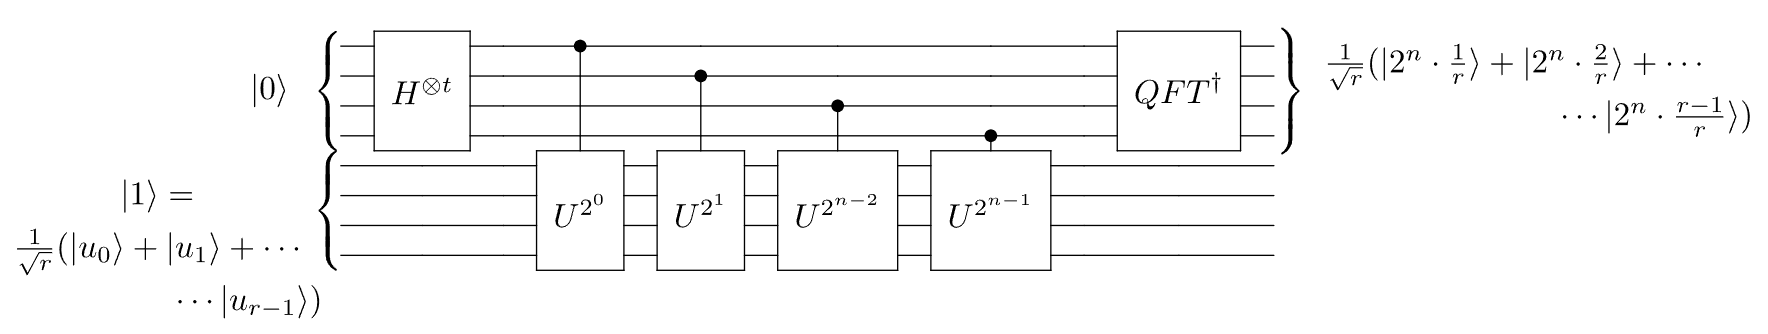

<a id="2.5.3"></a>
## 2.E.c. Implementación en Qiskit

En el siguiente ejemplo resolveremos el problema de encontrar el periodo para $a=7$ y $N=15$. Se proveerán los circuitos para $U$ donde,

$$U\ket{y}\equiv \ket{ay \, \text{mod} \, 15}$$

Para crear $U^x$, simplemente repetiremos el circuito $x$ veces. La función `c_amod15` devuelve la compuerta $U$ controlada para una potencia repetida.

Usaremos $8$ qubits.

In [54]:
def c_amod15(a, power):
    # Multiplicación conrolada por a mod 15
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' debe ser 2,4,7,8,11 o 13")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

In [55]:
n_count = 8  # número de qubits de conteo
a = 7

La siguiente función implemente la QFT$^{\dagger}$ ([Quantum Fourier Transform](https://en.wikipedia.org/wiki/Quantum_Fourier_transform)), que es parte de la QPE.

(Detalles de cómo implementar la QFT [aquí](https://learn.qiskit.org/course/ch-algorithms/quantum-fourier-transform.html#generalqft))

In [56]:
def qft_dagger(n):
    # QFT daga de n qubits, los prmero n qubits en circ
    qc = QuantumCircuit(n)
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

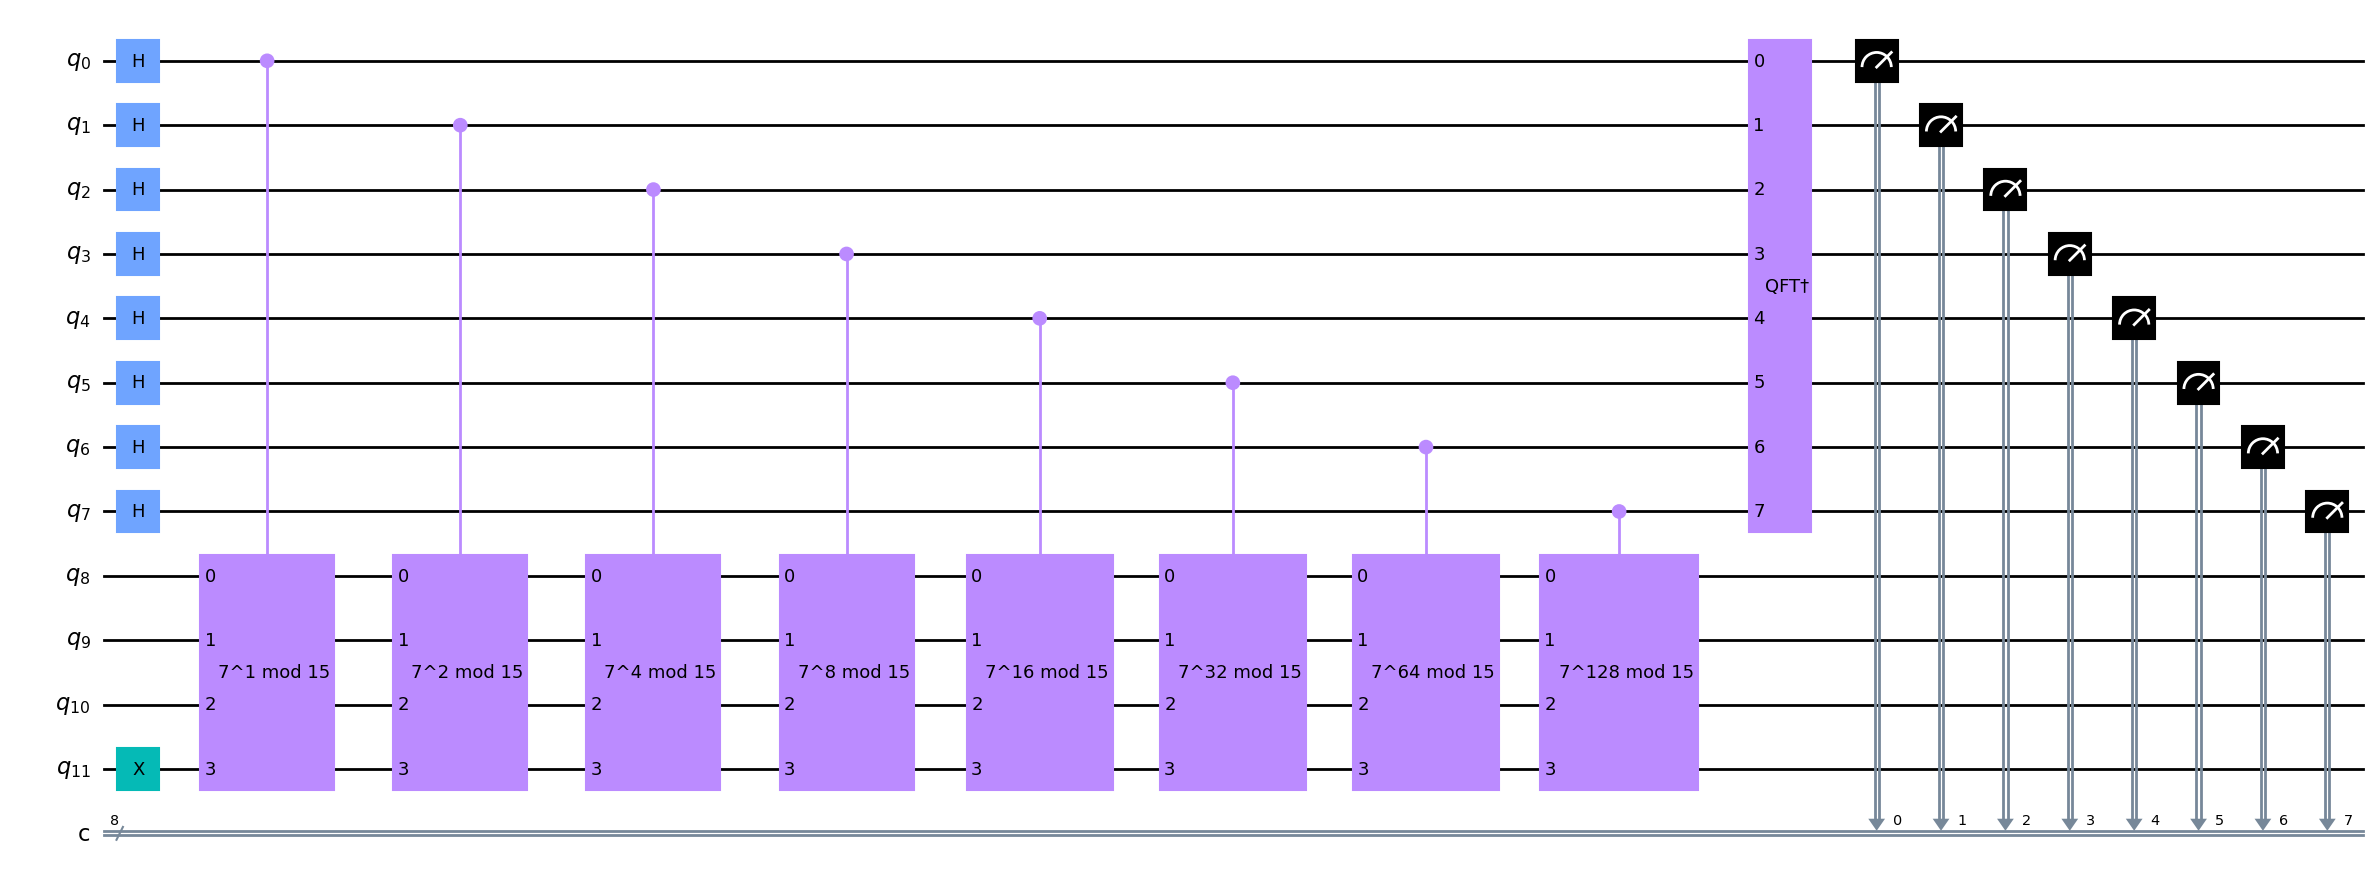

In [57]:
# Crear el circuito final


# circuito con n_count qubits de conteo
# más 4 qubits para que U actúe sobre ellos
qc = QuantumCircuit(n_count + 4, n_count)

# inicializar los qubits de conteo
# en el estado |+>
for q in range(n_count):
    qc.h(q)
    
# y un registro auxiliar en el estado |1>
qc.x(3+n_count)

# aplicar las U controladas
for q in range(n_count):
    qc.append(c_amod15(a, 2**q), 
             [q] + [i+n_count for i in range(4)])

# aplicar QFT daga
qc.append(qft_dagger(n_count), range(n_count))

# medir el circuito
qc.measure(range(n_count), range(n_count))
qc.draw('mpl', fold=-1)  # -1 significa 'no separar'

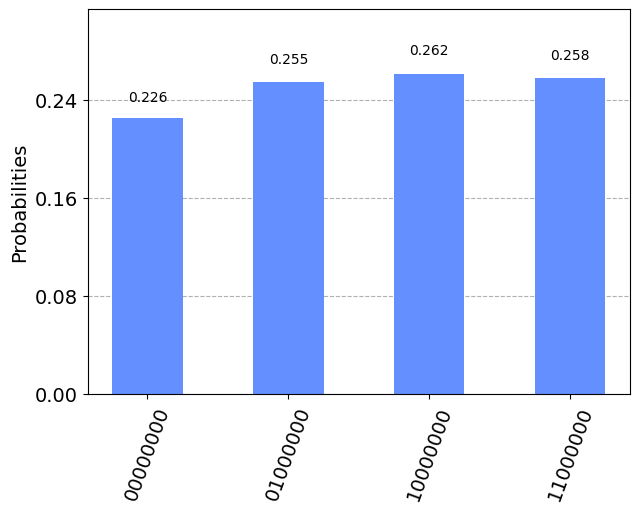

In [58]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
results = aer_sim.run(t_qc).result()
counts = results.get_counts()
plot_histogram(counts)

Como tenemos $8$ qubits, estos resultados corresponden a fases medidas de:

In [59]:
import pandas as pd

rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", 
                 f"{decimal}/{2**n_count} = {phase:.2f}"])
# Print the rows in a table
headers=["Salida del registro", "Fase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

        Salida del registro            Fase
0  11000000(bin) = 192(dec)  192/256 = 0.75
1  10000000(bin) = 128(dec)  128/256 = 0.50
2  01000000(bin) =  64(dec)   64/256 = 0.25
3  00000000(bin) =   0(dec)    0/256 = 0.00


Ahora podemos usar el algoritmo de fracciones continuas para intentar encontrar $s$ y $r$. Python tiene esta funcionalidad incorporada: podemos usar el módulo `fractions` para convertir un número flotante en un objeto `Fraction`, por ejemplo:

In [60]:
from fractions import Fraction

Fraction(0.666)

Fraction(5998794703657501, 9007199254740992)

Debido a que esto da fracciones que devuelven el resultado exactamente (en este caso, $0.6660000$...), esto puede dar resultados complicados como el de arriba. Podemos usar el método `.limit_denominator()` para obtener la fracción que más se parezca a nuestro número flotante, con el denominador por debajo de cierto valor:

In [61]:
# Obtener la fracción que más se asemeje a 0.666
# con denominador < 15
Fraction(0.666).limit_denominator(15)

Fraction(2, 3)

¡Mucho mejor! El orden ($r$) debe ser menor que $N$, por lo que estableceremos que el denominador máximo sea $15$:

In [62]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, f"{frac.numerator}/{frac.denominator}", frac.denominator])
# Print as a table
headers=["Fase", "Fracción", "Suposición para r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Fase Fracción  Suposición para r
0  0.75      3/4                  4
1  0.50      1/2                  2
2  0.25      1/4                  4
3  0.00      0/1                  1


Podemos ver que dos de los valores propios medidos nos dieron el resultado correcto: $r=4$, y podemos ver que el algoritmo de Shor tiene posibilidades de fallar. Estos malos resultados se deben a que $s=0$, o a que $s$ y $r$ no son coprimos y en lugar de $r$ nos dan un factor de $r$. La solución más sencilla a esto es simplemente repetir el experimento hasta obtener un resultado satisfactorio para $r$.

<a id="2.5.4"></a>
## 2.E.d. Exponenciación modular

El método de creación de las $U^{2^j}$ compuertas mediante la repetición de $U$ crece exponencialmente con $j$ y no dará como resultado un algoritmo de tiempo polinomial. Queremos una manera de crear el operador,

$$U^{2^j}\ket{y}=\ket{a^{2^j}y \; \text{mod} \, N}$$

que crece polinomialmente con $j$. Afortunadamente, calculando,

$$a^{2^j} \; \text{mod} \, N$$

eficientemente es posible. Las computadoras clásicas pueden usar un algoritmo conocido como *[repeated squaring](https://algorithmist.com/wiki/Repeated_squaring)* para calcular una exponenciación. En nuestro caso, dado que solo estamos tratando con exponenciaciones de la forma $2^j$, el algoritmo de elevación al cuadrado repetido se vuelve muy simple:

In [63]:
def a2jmodN(a, j, N):
    # Calcular a^{2^j} (mod N) con 'repeated squaring'
    for i in range(j):
        a = np.mod(a**2, N)
    return a

In [64]:
a2jmodN(7, 2049, 53)

47

Entonces, si es posible un algoritmo eficiente en Python, por lo que podemos usar el mismo algoritmo en una computadora cuántica. Desafortunadamente, a pesar de escalar polinómicamente con $j$, los circuitos de exponenciación modular no son sencillos y son el cuello de botella en el algoritmo de Shor. Una implementación amigable para principiantes se puede encontrar en [[Beauregard, S.](https://arxiv.org/abs/quant-ph/0205095)].

<a id="2.5.5"></a>
## 2.E.d. Factorización a partir de la determinación del periodo

No todos los problemas de factorización son difíciles; podemos detectar un número par al instante y saber que uno de sus factores es $2$. De hecho, existen criterios específicos para elegir números que son difíciles de factorizar, pero la idea básica es elegir el producto de dos números primos grandes.

Un algoritmo de factorización general primero verificará si hay un atajo para factorizar el número entero (¿el número es par? ¿Es el número de la forma $N=a^b$?), antes de buscar el periodo de Shor para el peor de los casos. 

$$$$

Para ver un ejemplo de cómo factorizar una pequeña cantidad de qubits, factorizaremos 15, que todos sabemos que es el producto de los números primos no tan grandes 3 y 5.

In [74]:
N = 15

El primer paso es elegir un número aleatorio, $a$, entre $1$ y $N-1$

In [75]:
from numpy.random import randint

np.random.seed(1) # Para hacer reproducibles los resultados
a = randint(2, 15)
print(a)

7


In [76]:
# ahora, comprobamos que no es ya un factor no trivial de N

from math import gcd # máximo común divisor b(greatest common divisor)
gcd(a, N)

1

Excelente. A continuación, hacemos el algoritmo de búsqueda de orden de Shor para $a = 7$ y $N = 15$. Recuerda que la fase que mediremos será $s/r$ donde,

$$a^r \, \text{mod} \, N = 1$$

y $s$ es un entero aleatorio entre $0$ y $r-1$.

In [77]:
def qpe_amod15(a):
    n_count = 8
    qc = QuantumCircuit(4+n_count, n_count)
    for q in range(n_count):
        qc.h(q)     # Inicializar qubits en el estado |+>
    qc.x(3+n_count) #  un registro auxiliar en el estado |1>
    for q in range(n_count): # aplicar operaciones U controladas
        qc.append(c_amod15(a, 2**q), 
                 [q] + [i+n_count for i in range(4)])
    qc.append(qft_dagger(n_count), range(n_count)) # aplicar la QFT inversa
    qc.measure(range(n_count), range(n_count))
    # simular los resultados
    aer_sim = Aer.get_backend('aer_simulator')
    # Configurar 'memory=True' permite ver una lista de cada lectura secuencial
    t_qc = transpile(qc, aer_sim)
    result = aer_sim.run(t_qc, shots=1, memory=True).result()
    readings = result.get_memory()
    print("Lectura del registro: " + readings[0])
    phase = int(readings[0],2)/(2**n_count)
    print("Fase correspondiente: %f" % phase)
    return phase

In [78]:
# a partir de esta fase, podemos encontrar fácilmente una suposición para r:

phase = qpe_amod15(a) # fase = s/r
Fraction(phase).limit_denominator(15) # el denominador debería decirnos r (eso esperamos)

Lectura del registro: 11000000
Fase correspondiente: 0.750000


Fraction(3, 4)

In [79]:
frac = Fraction(phase).limit_denominator(15)
s, r = frac.numerator, frac.denominator
print(r)

4


Ahora que tenemos $r$, podríamos usar esto para encontrar un factor de $N$. Dado que,

$$a^r \, \text{mod} \, N = 1$$

entonces, 

$$\big(a^r-1\big) \, \text{mod} \, N = 0$$

lo que significa que $N$ debe dividir $a^r-1$. Y si $r$ también es par, entonces podemos escribir,

$$a^r-1=\big(a^{r/2}-1\big)\big(a^{r/2}+1\big)$$

(si $r$ no es par, no podemos ir más allá y debemos intentarlo de nuevo con un valor diferente para $a$). Entonces hay una alta probabilidad de que el máximo común divisor de $N$ y $a^{r/2}-1$, o $a^{r/2}+1$ sea un factor propio de $N$.

In [80]:
guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
print(guesses)

[3, 5]


La celda de abajo repite el algoritmo hasta que se encuentra al menos un factor de $15$. Se debe intentar volver a ejecutar la celda varias veces para ver cómo se comporta.

In [82]:
a = 7
factor_found = False
attempt = 0
while not factor_found:
    attempt += 1
    print("Intento %i:" % attempt)
    phase = qpe_amod15(a) # fase = s/r
    frac = Fraction(phase).limit_denominator(N) # el denominador debería decirnos r (eso esperamos)
    r = frac.denominator
    print("Resultado: r = %i" % r)
    if phase != 0:
        # las suposiciones para los factores son gcd(x^{r/2} ±1 , 15)
        guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
        print("Factores supuestos: %i and %i" % (guesses[0], guesses[1]))
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0: # Check to see if guess is a factor
                print("*** Factor encontrado no trivial: %i ***" % guess)
                factor_found = True

Intento 1:
Lectura del registro: 11000000
Fase correspondiente: 0.750000
Resultado: r = 4
Factores supuestos: 3 and 5
*** Factor encontrado no trivial: 3 ***
*** Factor encontrado no trivial: 5 ***


Qiskit cunta cn una clase que nos facilota las cosas, llamada `Shor`, a la cual solo debemos enviarle el número al que le deseamos calcular sus factores primos:

In [73]:
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Shor


N = 15

backend = Aer.get_backend('aer_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)

shor = Shor(quantum_instance=quantum_instance)

result = shor.factor(N)

print(f"La lista de factores de {N} calculada por el algoritmo de Shor es {result.factors[0]}.")

La lista de factores de 15 calculada por el algoritmo de Shor es [3, 5].


<a id="3"></a>
# 3. Conclusiones

Esto ha sido una introducción a algunos algoritmos cuánticos, y su implementación en Qiskit, sin embago, aún falta profundizar en estos mismos algoritmos, y aprender sobre los que no se mencionaron en este notebook, por lo que se recomienda visitar los [Tutoriales de Qiskit](https://qiskit.org/documentation/locale/es_UN/tutorials.html) (los cuales están traducidos al Español), así como el [Qiskit Textbook](https://qiskit.org/learn/) (próximante traducido al Español).

<a id="4"></a>
# 4. Referencias
 
- Qiskit Documentation. Consultado en https://qiskit.org/documentation/
- Qiskit Textbook. Consultado en https://qiskit.org/learn/
- Qiskit Tutorials. Consultado en https://qiskit.org/documentation/tutorials.html
- QWold's Bronze tutorial. Consultado en https://gitlab.com/qworld/bronze-qiskit
- QWold's Silver tutorial. Consultado en https://gitlab.com/qworld/silver
- Quantum Inspire, Knowledge base. Consultado en https://www.quantum-inspire.com/kbase/full-adder/
- Nielsen, M., & Chuang, I. (2010). Quantum Computation and Quantum Information: 10th Anniversary Edition. Cambridge: Cambridge University Press. doi:10.1017/CBO9780511976667
- Kaye P., Laflamme R., & Mosca M. (2007). An Introduction to Quantum Computing. Oxford: Oxford University Press. ISBN: 9780198570493
- H. Md Hasan Babu (2020). Quantum Computing, A pathway to quantum logic design. Bristol: IOP Publishing. doi:10.1088/978-0-7503-2747-3

## Donaciones
<br>
<center>
Puedes donar una vez en el siguiente enlace (Ko-Fi):

<br>
    
*Click en la imagen.*

<a href="https://ko-fi.com/rcrdphysics">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />

</center>